In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

## Data loading 

In [ ]:
application_train = pd.read_csv("/content/drive/MyDrive/Home Credit/Data/application_train.csv")
application_test = pd.read_csv("/content/drive/MyDrive/Home Credit/Data/application_test.csv")

In [ ]:
# pos_cash = pd.read_csv("/content/drive/MyDrive/Home Credit/Data/POS_CASH_balance.csv")
# installments = pd.read_csv("/content/drive/MyDrive/Home Credit/Data/installments_payments.csv")
# credit_df = pd.read_csv("/content/drive/MyDrive/Home Credit/Data/credit_card_balance.csv");

In [ ]:
# b=pd.read_csv("/content/drive/MyDrive/Home Credit/Data/bureau.csv")
# bur=pd.read_csv("/content/drive/MyDrive/Home Credit/Data/bureau_balance.csv")
# prev=pd.read_csv("/content/drive/MyDrive/Home Credit/Data/previous_application.csv")

In [ ]:
print("application_train.shape:",application_train.shape)
print("application_test.shape :",application_test.shape)

application_train.shape: (199882, 122)
application_test.shape : (107629, 121)


In [ ]:
train_id = application_train["SK_ID_CURR"]
train_target = application_train["TARGET"]
test_id = application_test["SK_ID_CURR"]

In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,aou6ud,0,Cash loans,M,N,Y,0,360000.0,1125000.0,33025.5,1125000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.022800,-18943,-7369,-2353.0,-2479,NaN,1,1,0,1,0,0,Managers,2.0,2,2,WEDNESDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,xxbaad,0,Cash loans,F,N,Y,0,112500.0,251280.0,13630.5,180000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.022625,-13894,-1393,-5698.0,-5698,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1645.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
2,xdrbad,0,Cash loans,F,N,Y,0,225000.0,544491.0,15916.5,454500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.035792,-19821,-2075,-2121.0,-3379,NaN,1,1,1,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,...,0.0641,0.0476,0.0078,0.0100,reg oper account,block of flats,0.0563,Panel,No,0.0,0.0,0.0,0.0,-1062.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
3,rbdd7d,0,Cash loans,F,N,N,2,211500.0,900000.0,26316.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006207,-13034,-2205,-1193.0,-4141,NaN,1,1,1,1,0,0,Laborers,4.0,2,2,THURSDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-484.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,90000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-18393,-1694,-8279.0,-1890,NaN,1,1,1,1,0,0,Sales staff,2.0,3,3,SATURDAY,12,0,0,0,0,0,0,...,0.3249,0.5061,0.0233,0.0357,reg oper account,block of flats,0.4617,Panel,No,3.0,0.0,3.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [ ]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,7auxod,Cash loans,F,N,Y,0,225000.0,728460.0,44694.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006008,-18437,-214,-2287.0,-1565,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,SATURDAY,16,0,0,0,1,1,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,xur7ur,Cash loans,F,N,Y,0,171000.0,630000.0,22756.5,630000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.014520,-17714,365243,-2115.0,-1260,NaN,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,XNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-809.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,2.0,6.0
2,eau6rx,Cash loans,F,N,N,0,117000.0,724981.5,27742.5,648000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.025164,-11243,-1532,-1622.0,-2423,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,6.0,3.0,-2600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,obdr67,Revolving loans,F,N,N,2,135000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Incomplete higher,Married,With parents,0.030755,-8603,-1544,-1047.0,-1289,NaN,1,1,0,1,0,0,NaN,4.0,2,2,SUNDAY,12,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,7xbu7d,Cash loans,F,N,N,0,225000.0,248760.0,29650.5,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.008019,-15514,-410,-1258.0,-1762,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,WEDNESDAY,10,1,1,0,1,1,0,Restaurant,...,NaN,0.0089,NaN,NaN,NaN,block of flats,0.0121,Block,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


we have one extra column in the application_train data , i.e TARGET 

In [ ]:
application_train['TARGET'].value_counts()

0    183651
1     16231
Name: TARGET, dtype: int64

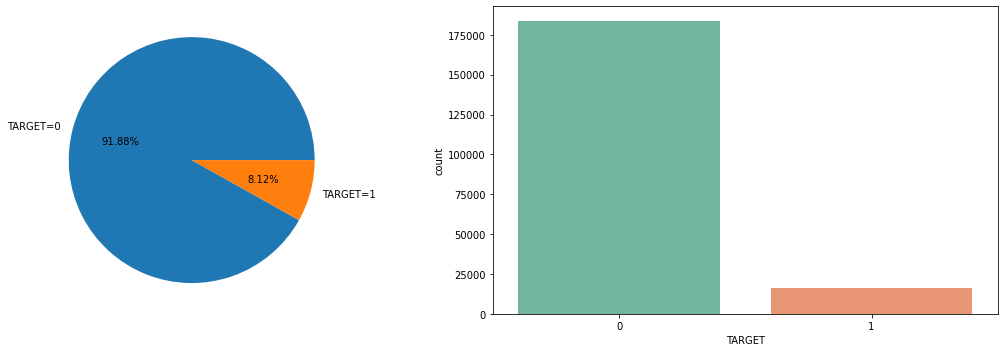

In [ ]:
fig = plt.figure(figsize =(15, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["TARGET"].value_counts(),labels = ["TARGET=0","TARGET=1"],autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

Imbalanced dataset

In [ ]:
application_train.dtypes.value_counts()

float64    65
int64      40
object     17
dtype: int64

In [ ]:
obj_type  = application_train.dtypes[application_train.dtypes=='object'].index
float_type  = application_train.dtypes[application_train.dtypes=='float64'].index
int_type  = application_train.dtypes[application_train.dtypes=='int64'].index

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Handling categorical data 

In [ ]:
print(obj_type)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')


In [ ]:
label_list = []
one_hot_list = []
drop_list = []

In [ ]:
application_train[obj_type].head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,aou6ud,Cash loans,M,N,Y,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,Managers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
1,xxbaad,Cash loans,F,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Self-employed,NaN,NaN,NaN,NaN
2,xdrbad,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,WEDNESDAY,Hotel,reg oper account,block of flats,Panel,No
3,rbdd7d,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,THURSDAY,Industry: type 3,NaN,NaN,NaN,NaN
4,rexddr,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,Panel,No


Missing Values in categorical data

In [ ]:
missing_data(application_train[obj_type])

,Total,Percent
FONDKAPREMONT_MODE,136876,68.478402
WALLSMATERIAL_MODE,101759,50.909537
HOUSETYPE_MODE,100429,50.244144
EMERGENCYSTATE_MODE,94844,47.449995
OCCUPATION_TYPE,62737,31.387018
NAME_TYPE_SUITE,843,0.421749
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000


In [ ]:
application_train["CODE_GENDER"].value_counts()

F      131626
M       68252
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
application_train['CODE_GENDER'].replace('XNA','F', inplace=True)

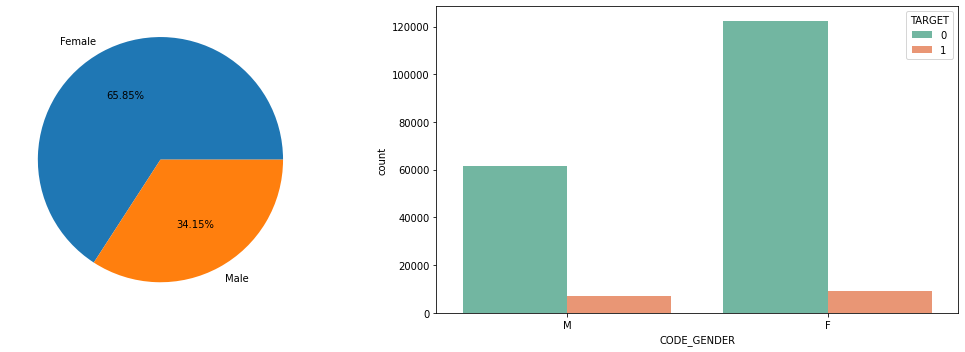

In [ ]:
fig = plt.figure(figsize =(15, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["CODE_GENDER"].value_counts(),labels = ["Female","Male"],autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="CODE_GENDER",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

Observation : Male having difficulty in repaying is high compared to Female from the above graph
More No of Female Applicants than Male Applicants.

In [ ]:
def plot_hist(col):
    plt.suptitle(col, fontsize=30)
    
    application_train.loc[application_train['TARGET'] == 0, col].hist( )
    application_train.loc[application_train['TARGET'] == 1, col].hist( )
    plt.legend(['TARGET(0)', 'TARGET(1)'])
    plt.show()

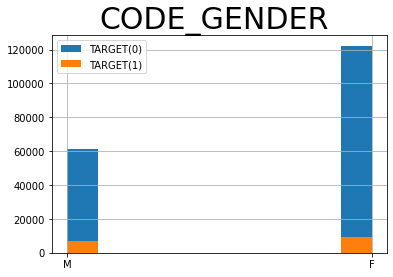

In [ ]:
plot_hist("CODE_GENDER")

# NAME_CONTRACT_TYPE

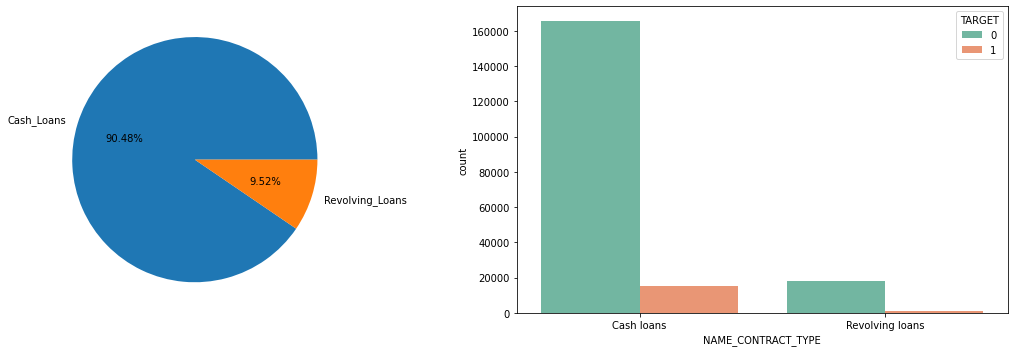

In [ ]:
fig = plt.figure(figsize =(15, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["NAME_CONTRACT_TYPE"].value_counts(),labels = ["Cash_Loans","Revolving_Loans"],autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="NAME_CONTRACT_TYPE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

Cash Loans are More than Revolving loans . 

## FLAG_OWN_CAR

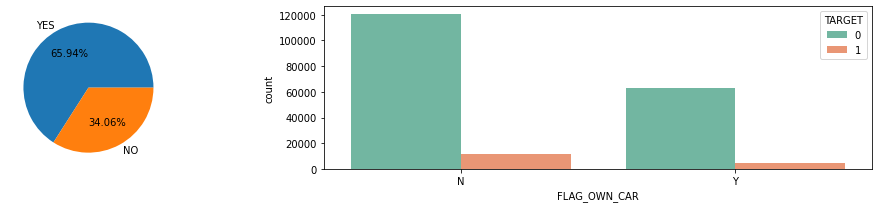

In [ ]:
fig = plt.figure(figsize =(15, 3)) 
plt.subplot(1,2,1)
plt.pie(application_train["FLAG_OWN_CAR"].value_counts(),labels = ["YES","NO"],autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="FLAG_OWN_CAR",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## FLAG_OWN_REALTY

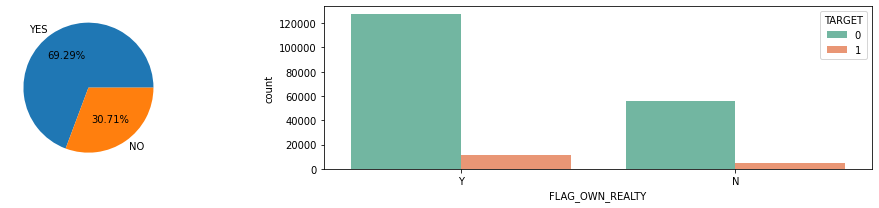

In [ ]:
fig = plt.figure(figsize =(15, 3)) 
plt.subplot(1,2,1)
plt.pie(application_train["FLAG_OWN_REALTY"].value_counts(),labels = ["YES","NO"],autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="FLAG_OWN_REALTY",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## NAME_EDUCATION_TYPE

In [ ]:
application_train["NAME_EDUCATION_TYPE"].value_counts().index

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object')

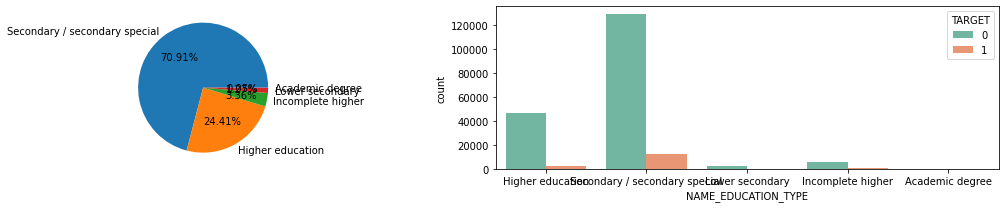

In [ ]:
fig = plt.figure(figsize =(15, 3)) 
plt.subplot(1,2,1)
plt.pie(application_train["NAME_EDUCATION_TYPE"].value_counts(),labels =['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="NAME_EDUCATION_TYPE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## NAME_TYPE_SUITE

In [ ]:
application_train["NAME_TYPE_SUITE"].value_counts().index

Index(['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B',
       'Other_A', 'Group of people'],
      dtype='object')

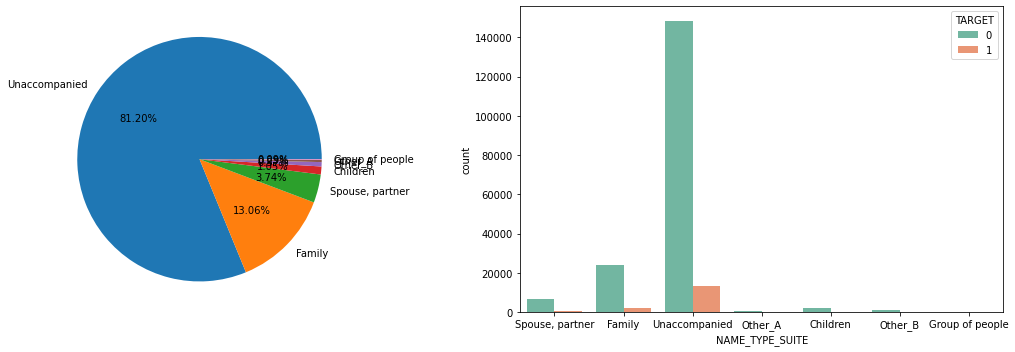

In [ ]:
fig = plt.figure(figsize =(15, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["NAME_TYPE_SUITE"].value_counts(),labels =['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B',
       'Other_A', 'Group of people'],autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="NAME_TYPE_SUITE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## NAME_INCOME_TYPE

In [ ]:
l=application_train["NAME_INCOME_TYPE"].value_counts()
l

Working                 103313
Commercial associate     46614
Pensioner                35858
State servant            14057
Unemployed                  16
Student                     13
Businessman                  8
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

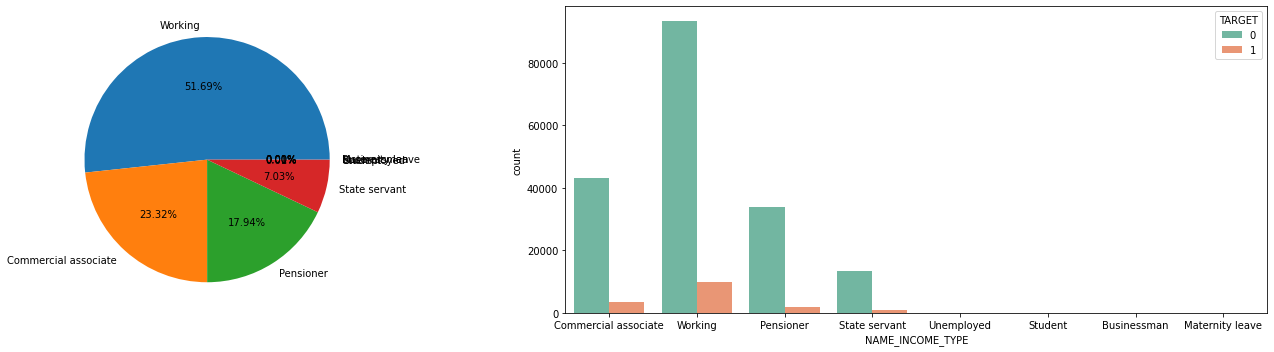

In [ ]:
fig = plt.figure(figsize =(20, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["NAME_INCOME_TYPE"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="NAME_INCOME_TYPE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## NAME_FAMILY_STATUS

In [ ]:
l=application_train["NAME_FAMILY_STATUS"].value_counts()
l

Married                 127846
Single / not married     29509
Civil marriage           19418
Separated                12827
Widow                    10281
Unknown                      1
Name: NAME_FAMILY_STATUS, dtype: int64

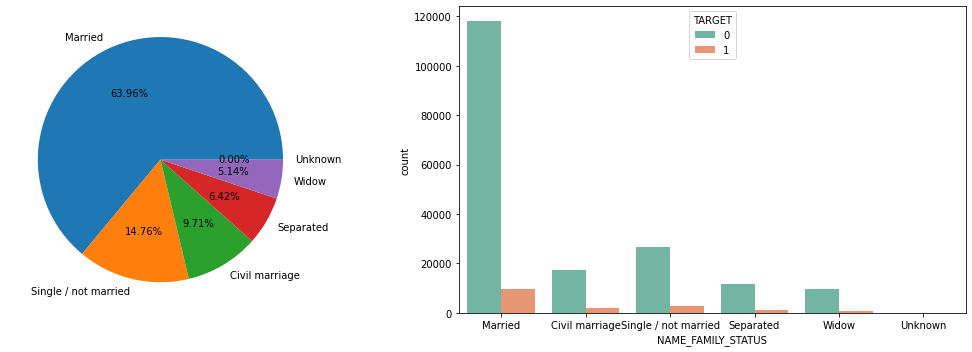

In [ ]:
fig = plt.figure(figsize =(15, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["NAME_FAMILY_STATUS"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="NAME_FAMILY_STATUS",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## NAME_HOUSING_TYPE

In [ ]:
l= application_train["NAME_HOUSING_TYPE"].value_counts()
l

House / apartment      177339
With parents             9654
Municipal apartment      7301
Rented apartment         3126
Office apartment         1724
Co-op apartment           738
Name: NAME_HOUSING_TYPE, dtype: int64

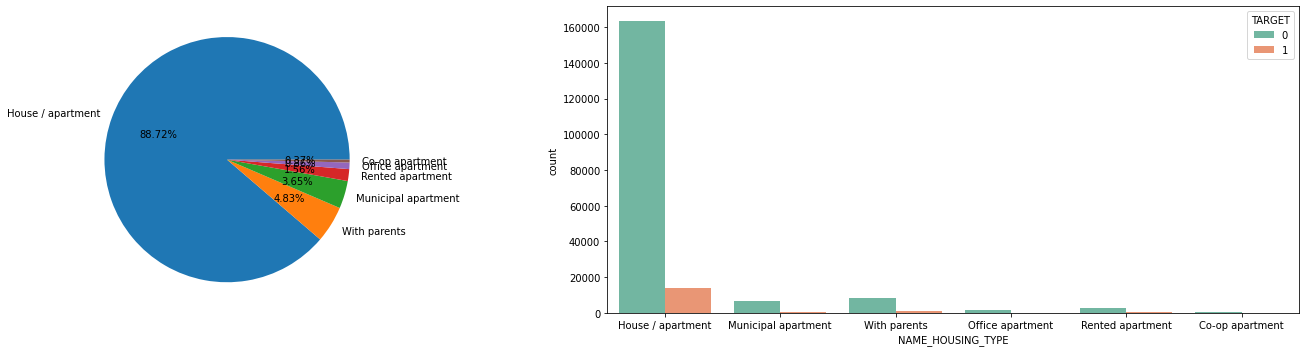

In [ ]:
fig = plt.figure(figsize =(20, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["NAME_HOUSING_TYPE"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="NAME_HOUSING_TYPE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## OCCUPATION_TYPE

In [ ]:
l=application_train["OCCUPATION_TYPE"].value_counts()
l

Laborers                 35833
Sales staff              20742
Core staff               17959
Managers                 13901
Drivers                  12126
High skill tech staff     7404
Accountants               6428
Medicine staff            5459
Security staff            4361
Cooking staff             3858
Cleaning staff            2979
Private service staff     1739
Low-skill Laborers        1404
Waiters/barmen staff       884
Secretaries                856
Realty agents              518
IT staff                   350
HR staff                   344
Name: OCCUPATION_TYPE, dtype: int64

## WEEKDAY_APPR_PROCESS_START



In [ ]:
l=application_train["WEEKDAY_APPR_PROCESS_START"].value_counts()
l

TUESDAY      35085
WEDNESDAY    33857
THURSDAY     32958
MONDAY       32760
FRIDAY       32652
SATURDAY     22133
SUNDAY       10437
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

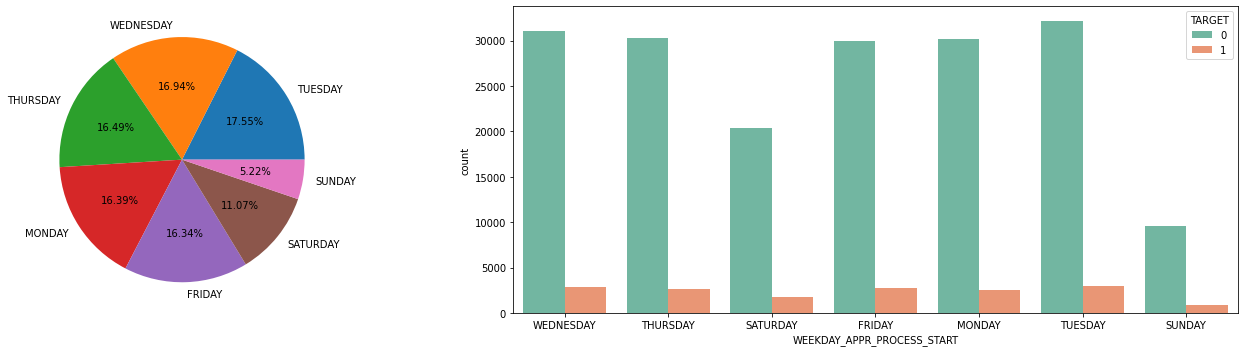

In [ ]:
fig = plt.figure(figsize =(20, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["WEEKDAY_APPR_PROCESS_START"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="WEEKDAY_APPR_PROCESS_START",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## ORGANIZATION_TYPE

In [ ]:
l=application_train["ORGANIZATION_TYPE"].value_counts()
l

Business Entity Type 3    44385
XNA                       35869
Self-employed             24981
Other                     10956
Medicine                   7180
Business Entity Type 2     6872
Government                 6833
School                     5831
Trade: type 7              4977
Kindergarten               4464
Construction               4415
Business Entity Type 1     3887
Transport: type 4          3511
Trade: type 3              2222
Industry: type 9           2212
Industry: type 3           2130
Security                   2122
Housing                    1913
Industry: type 11          1741
Military                   1733
Bank                       1611
Agriculture                1572
Police                     1503
Postal                     1431
Transport: type 2          1406
Security Ministries        1298
Trade: type 2              1203
Restaurant                 1156
Services                   1006
University                  871
Industry: type 7            848
Transpor

## FONDKAPREMONT_MODE

In [ ]:
l=application_train["FONDKAPREMONT_MODE"].value_counts()
l

reg oper account         47830
reg oper spec account     7811
not specified             3738
org spec account          3627
Name: FONDKAPREMONT_MODE, dtype: int64

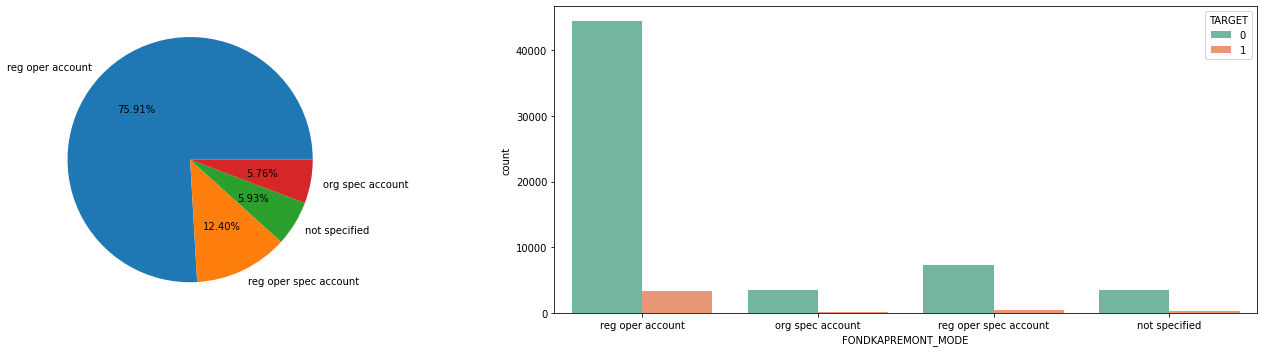

In [ ]:
fig = plt.figure(figsize =(20, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["FONDKAPREMONT_MODE"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="FONDKAPREMONT_MODE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## HOUSETYPE_MODE

In [ ]:
l=application_train["HOUSETYPE_MODE"].value_counts()
l

block of flats      97684
specific housing      977
terraced house        792
Name: HOUSETYPE_MODE, dtype: int64

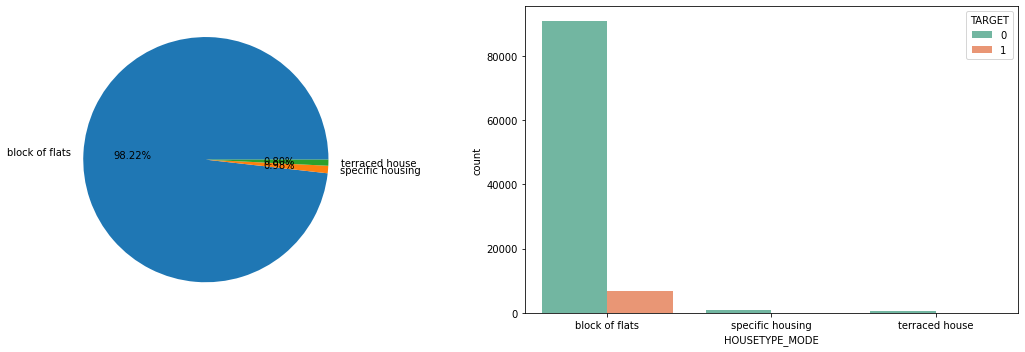

In [ ]:
fig = plt.figure(figsize =(15, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["HOUSETYPE_MODE"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="HOUSETYPE_MODE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## WALLSMATERIAL_MODE 

In [ ]:
l=application_train["WALLSMATERIAL_MODE"].value_counts()
l

Panel           42916
Stone, brick    42087
Block            6031
Wooden           3401
Mixed            1496
Monolithic       1146
Others           1046
Name: WALLSMATERIAL_MODE, dtype: int64

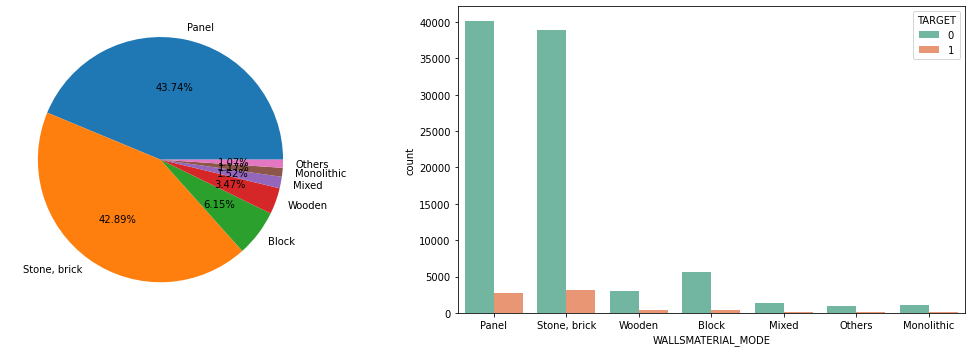

In [ ]:
fig = plt.figure(figsize =(15, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["WALLSMATERIAL_MODE"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="WALLSMATERIAL_MODE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## EMERGENCYSTATE_MODE

In [ ]:
l=application_train["EMERGENCYSTATE_MODE"].value_counts()
l

No     103520
Yes      1518
Name: EMERGENCYSTATE_MODE, dtype: int64

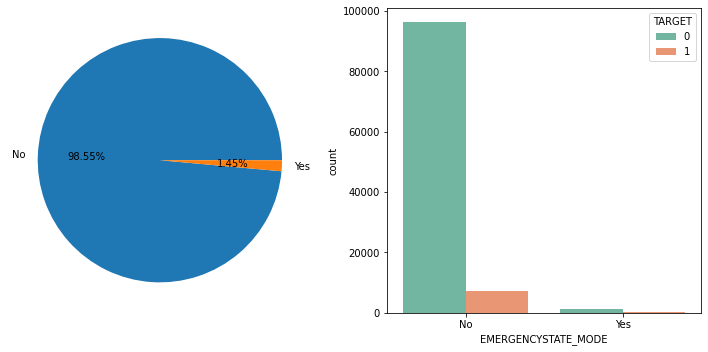

In [ ]:
fig = plt.figure(figsize =(10, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["EMERGENCYSTATE_MODE"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="EMERGENCYSTATE_MODE",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

In [ ]:
obj_type

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
label_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'ORGANIZATION_TYPE']
one_hot_list = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START','FONDKAPREMONT_MODE','WALLSMATERIAL_MODE']
drop_list = ["HOUSETYPE_MODE","EMERGENCYSTATE_MODE"]

In [ ]:
le = LabelEncoder()
for x in label_list:
    le.fit(application_train[x])
    application_train[x] = le.transform(application_train[x]) 
    application_test[x] = le.transform(application_test[x])
    

In [ ]:
application_train.drop(drop_list,axis=1,inplace=True)
application_test.drop(drop_list,axis=1,inplace=True)

In [ ]:
train_id = application_train["SK_ID_CURR"]
test_id = application_test["SK_ID_CURR"]
train_target = application_train["TARGET"]

In [ ]:
application_train.drop(["SK_ID_CURR","TARGET"],axis=1,inplace=True)
application_test.drop(["SK_ID_CURR"],axis=1,inplace=True)

In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 118)
(107629, 118)


In [ ]:
obj_type  = application_train.dtypes[application_train.dtypes=='object'].index

In [ ]:
obj_type

Index(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [ ]:
application_train = pd.get_dummies(application_train,columns=one_hot_list)
application_test = pd.get_dummies(application_test,columns=one_hot_list)

In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 177)
(107629, 177)


In [ ]:
application_train, application_test = application_train.align(application_test, join ='inner', axis = 1)

In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 177)
(107629, 177)


In [ ]:
application_test["SK_ID_CURR"] = test_id
application_train["SK_ID_CURR"] = train_id
application_train["TARGET"] = train_target

## Handling NUMERICAL DATA

In [ ]:
application_train[int_type].head()

,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,0,-18943,-7369,-2479,1,1,0,1,0,0,2,2,11,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-13894,-1393,-5698,1,1,0,1,0,0,2,2,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,-19821,-2075,-3379,1,1,1,1,0,0,2,2,16,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,-13034,-2205,-4141,1,1,1,1,0,0,2,2,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,-18393,-1694,-1890,1,1,1,1,0,0,3,3,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for x in int_type:
    print(x)

TARGET
CNT_CHILDREN
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21


## CNT_CHILDREN

In [ ]:
l=application_train['CNT_CHILDREN'].value_counts()
l

0     139723
1      39887
2      17439
3       2463
4        282
5         55
6         15
7          6
14         3
19         2
12         2
9          2
11         1
10         1
8          1
Name: CNT_CHILDREN, dtype: int64

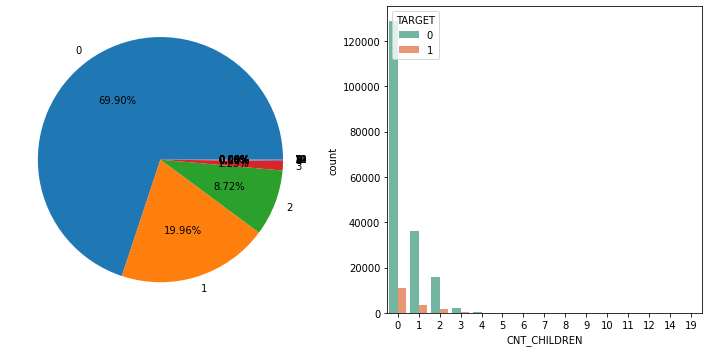

In [ ]:
fig = plt.figure(figsize =(10, 5)) 
plt.subplot(1,2,1)
plt.pie(application_train["CNT_CHILDREN"].value_counts(),labels =l.index,autopct='%1.2f%%') 

plt.subplot(1,2,2)
sns.countplot(x="CNT_CHILDREN",hue="TARGET",palette ="Set2",data=application_train)
plt.tight_layout()
plt.show()

## DAYS_BIRTH   
Client's age in days at the time of application	,time only relative to the application

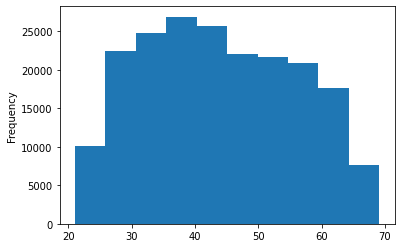

In [ ]:
application_train['DAYS_BIRTH'].apply(lambda x : -1*x/365).plot.hist()

In [ ]:
application_train['DAYS_BIRTH'].apply(lambda x : -1*x/365).describe()

count    199882.000000
mean         43.909166
std          11.955512
min          21.021918
25%          33.961644
50%          43.117808
75%          53.890411
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## DAYS_EMPLOYED

In [ ]:
application_train['DAYS_EMPLOYED'].describe()

count    199882.000000
mean      63590.955214
std      141083.570901
min      -17912.000000
25%       -2761.000000
50%       -1215.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
application_train['DAYS_EMPLOYED'].apply(lambda x : -1*x/365).describe()

count    199882.000000
mean       -174.221795
std         386.530331
min       -1000.665753
25%           0.794521
50%           3.328767
75%           7.564384
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

here we see that max no of days employed showing 1000 years and showing positive . these are outliers.

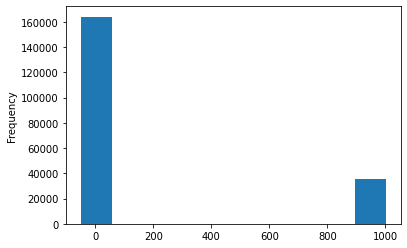

In [ ]:
application_train['DAYS_EMPLOYED'].apply(lambda x : x/365).plot.hist()

So the DAYS_EMPLOYED greater than the 100 years are considered as outliers , we must Delete the Outliers 

In [ ]:
application_train['DAYS_EMPLOYED'].apply(lambda x : x/365).value_counts()

 1000.665753    35869
-0.547945         108
-0.545205         108
-0.627397         108
-0.580822         106
                ...  
-25.232877          1
-37.191781          1
-20.958904          1
-35.967123          1
-26.400000          1
Name: DAYS_EMPLOYED, Length: 11543, dtype: int64

35869 rows has the Days employed value 1000 years ,changing these rows to nan

In [ ]:
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

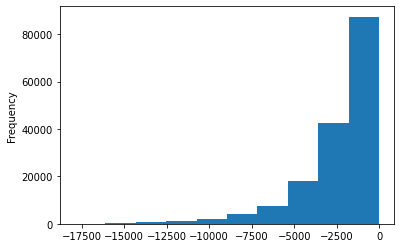

In [ ]:
application_train['DAYS_EMPLOYED'].plot.hist()

## FLAG_MOBIL : 
Did client provide mobile phone (1=YES, 0=NO)

In [ ]:
l=application_train['FLAG_MOBIL'].value_counts()
l

1    199882
Name: FLAG_MOBIL, dtype: int64

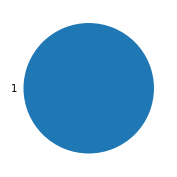

In [ ]:
fig = plt.figure(figsize =(8, 3)) 
plt.subplot(1,2,1)
plt.pie(application_train["FLAG_MOBIL"].value_counts(),labels =l.index) 

# plt.subplot(1,2,2)
# sns.countplot(x="CNT_CHILDREN",hue="TARGET",palette ="Set2",data=application_train)
# plt.tight_layout()
plt.show()

In [ ]:
application_train['FLAG_MOBIL'].value_counts()

1    199882
Name: FLAG_MOBIL, dtype: int64

In [ ]:
application_test['FLAG_MOBIL'].value_counts()

1    107628
0         1
Name: FLAG_MOBIL, dtype: int64

so droping the column FLAG_MOBIL

In [ ]:
application_train.drop(['FLAG_MOBIL'],axis=1,inplace=True)
application_test.drop(['FLAG_MOBIL'],axis=1,inplace=True)

## FLAG_DOCUMENT_#
The below are the documents may the necessary documents ,They are submitted by all most all, so they do not contribute to any information in prediction 

In [ ]:
d=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
   'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
   'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [ ]:
#for example :
l=application_train['FLAG_DOCUMENT_4'].value_counts()
l

0    199862
1        20
Name: FLAG_DOCUMENT_4, dtype: int64

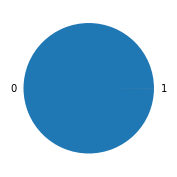

In [ ]:
fig = plt.figure(figsize =(8, 3)) 
plt.subplot(1,2,1)
plt.pie(application_train["FLAG_DOCUMENT_4"].value_counts(),labels =l.index) 
plt.show()

In [ ]:
l=application_train['FLAG_DOCUMENT_9'].value_counts()
l

0    199112
1       770
Name: FLAG_DOCUMENT_9, dtype: int64

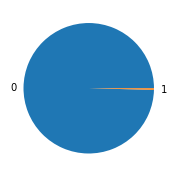

In [ ]:
fig = plt.figure(figsize =(8, 3)) 
plt.subplot(1,2,1)
plt.pie(application_train["FLAG_DOCUMENT_9"].value_counts(),labels =l.index) 
plt.show()

In [ ]:
application_train.drop(d,axis=1,inplace=True)
application_test.drop(d,axis=1,inplace=True)

In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 161)
(107629, 160)


## Handling Float

In [ ]:
def plot_kde(col):
    plt.suptitle(col, fontsize=30)
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, col],label='TARGET=0')
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, col],label='TARGET=1')
    plt.legend(['TARGET(0)', 'TARGET(1)'])
    plt.show()

In [ ]:
def plot_hist(col):
    plt.suptitle(col, fontsize=30)
    
    application_train.loc[application_train['TARGET'] == 0, col].hist( )
    application_train.loc[application_train['TARGET'] == 1, col].hist( )
    plt.legend(['TARGET(0)', 'TARGET(1)'])
    plt.show()

In [ ]:
def kde_hist(col):
    plt.suptitle(col, fontsize=30)
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0,col], ax=ax[0], label='TARGET(0)')
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1,col], ax=ax[0], label='TARGET(1)')
    ax[0].set_title('KDE plot')
    ax[1].set_title('Histogram plot')
    application_train.loc[application_train['TARGET'] == 0, col].hist(ax=ax[1])
    application_train.loc[application_train["TARGET"] == 1, col].hist(ax=ax[1])
    ax[1].legend(['TARGET(0)', 'TARGET(1)'])

    plt.show()

## AMT_INCOME_TOTAL

In [ ]:
missing_data(pd.DataFrame(application_train["AMT_INCOME_TOTAL"]))

,Total,Percent
AMT_INCOME_TOTAL,0,0.0


In [ ]:
application_train["AMT_INCOME_TOTAL"].describe()

count    1.998820e+05
mean     1.686329e+05
std      1.066414e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.350000e+07
Name: AMT_INCOME_TOTAL, dtype: float64

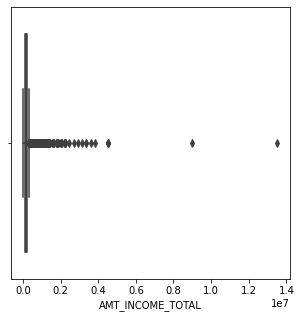

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(application_train["AMT_INCOME_TOTAL"])

<Figure size 432x288 with 0 Axes>

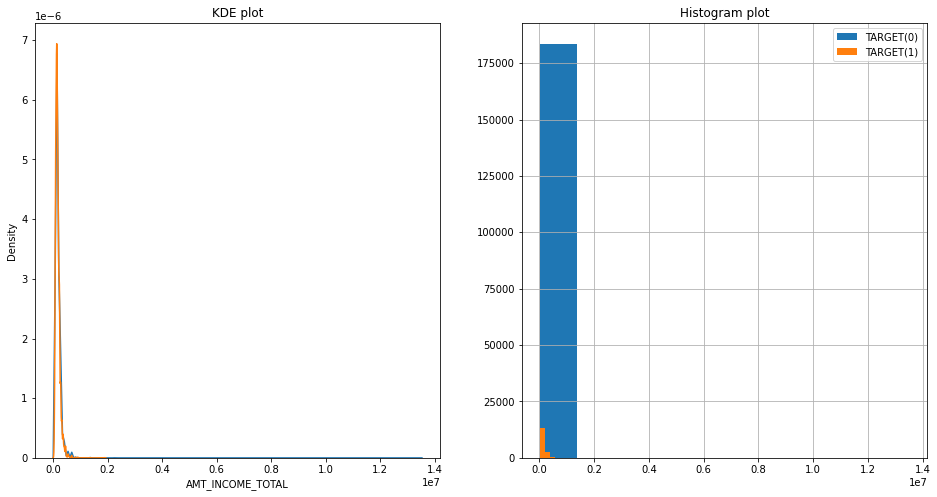

In [ ]:
kde_hist("AMT_INCOME_TOTAL")

we can observe that higher income does not have any problem in repaying the loan 

## AMT_CREDIT : Credit amount of the loan

In [ ]:
missing_data(pd.DataFrame(application_train["AMT_CREDIT"]))

,Total,Percent
AMT_CREDIT,0,0.0


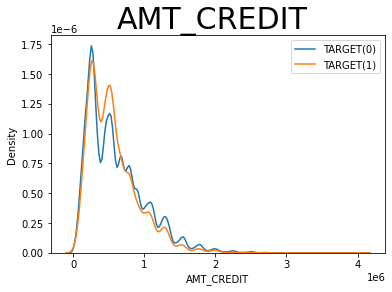

In [ ]:
plot_kde("AMT_CREDIT")

## AMT_ANNUITY : Loan annuity

In [ ]:
missing_data(pd.DataFrame(application_train["AMT_ANNUITY"]))

,Total,Percent
AMT_ANNUITY,10,0.005003


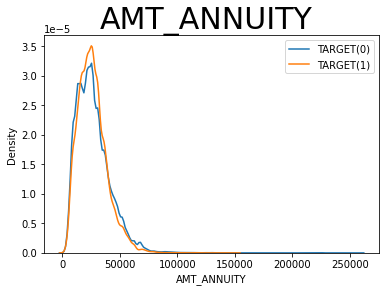

In [ ]:
plot_kde("AMT_ANNUITY")

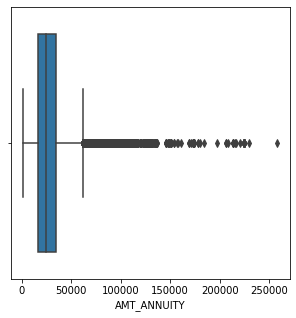

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(application_train["AMT_ANNUITY"])

## OWN_CAR_AGE  :Age of client's car

In [ ]:
missing_data(pd.DataFrame(application_train["OWN_CAR_AGE"]))

,Total,Percent
OWN_CAR_AGE,131814,65.945908


In [ ]:
application_train["OWN_CAR_AGE"].describe()

count    68068.000000
mean        12.025122
std         11.918506
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64

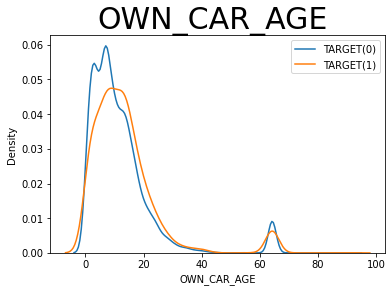

In [ ]:
plot_kde("OWN_CAR_AGE")

considering nan value means no car ,so no age so filling with zero.

In [ ]:
application_train["OWN_CAR_AGE"].fillna(0,inplace=True)
application_test["OWN_CAR_AGE"].fillna(0,inplace=True)

## CNT_FAM_MEMBERS : How many family members does client have

In [ ]:
missing_data(pd.DataFrame(application_train["CNT_FAM_MEMBERS"]))

,Total,Percent
CNT_FAM_MEMBERS,1,0.0005


In [ ]:
application_train["CNT_FAM_MEMBERS"].value_counts()

2.0     102845
1.0      43891
3.0      34383
4.0      16105
5.0       2304
6.0        268
7.0         54
8.0         13
9.0          6
16.0         2
20.0         2
14.0         2
10.0         2
12.0         1
13.0         1
11.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

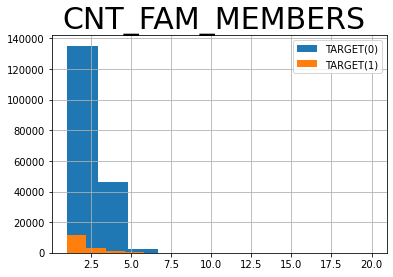

In [ ]:
plot_hist("CNT_FAM_MEMBERS")

we can observer that more the family members difficulty in paying loan .

## EXT_SOURCE_1 ,EXT_SOURCE_2,EXT_SOURCE_3 : 
Normalized score from external data source

In [ ]:
missing_data(pd.DataFrame(application_train[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]))

,Total,Percent
EXT_SOURCE_1,112803,56.434797
EXT_SOURCE_3,39656,19.839705
EXT_SOURCE_2,426,0.213126


In [ ]:
# #droping EXT_SOURCE_1
# application_train.drop(["EXT_SOURCE_1"],axis=1,inplace=True)
# application_test.drop(["EXT_SOURCE_1"],axis=1,inplace=True)


<Figure size 432x288 with 0 Axes>

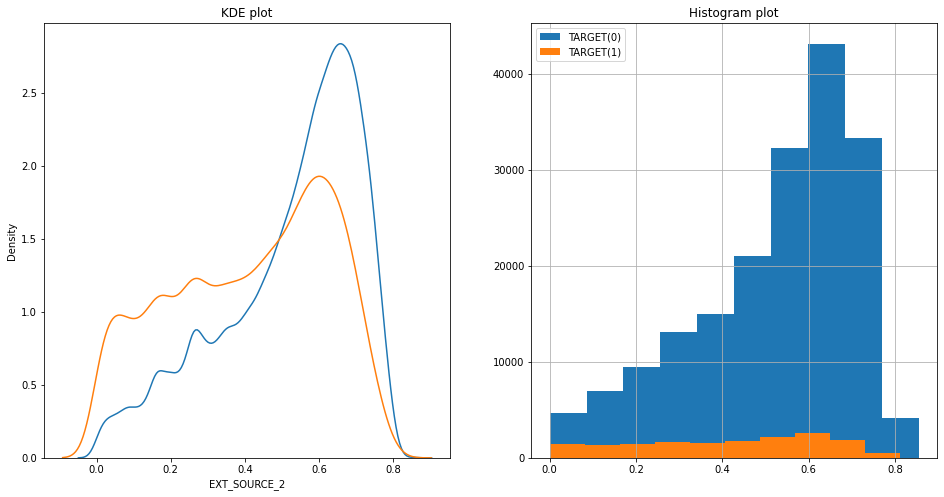

In [ ]:
kde_hist("EXT_SOURCE_2")

<Figure size 432x288 with 0 Axes>

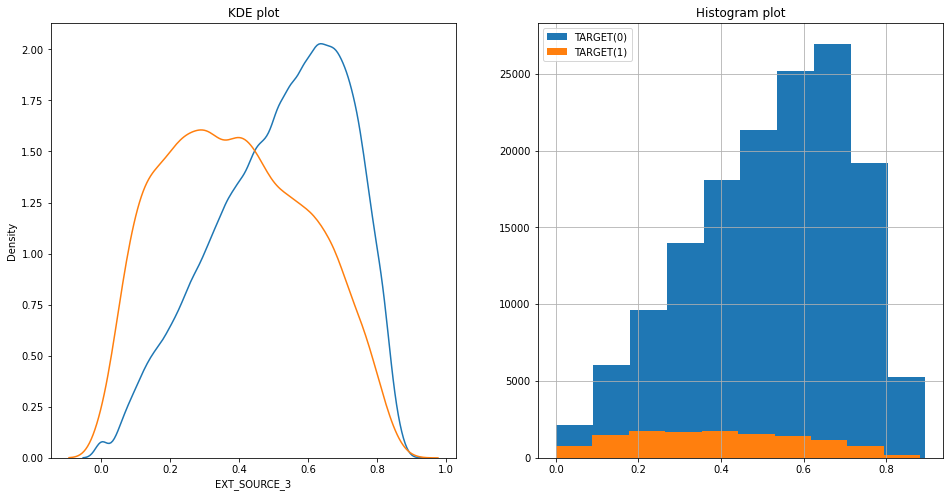

In [ ]:
kde_hist("EXT_SOURCE_3")

## TOTALAREA_MODE

In [ ]:
missing_data(pd.DataFrame(application_train["TOTALAREA_MODE"]))

,Total,Percent
TOTALAREA_MODE,96610,48.333517


In [ ]:
application_train["TOTALAREA_MODE"].describe()

count    103272.000000
mean          0.102380
std           0.106883
min           0.000000
25%           0.041400
50%           0.068800
75%           0.127700
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

In [ ]:
application_train["TOTALAREA_MODE"].fillna(0,inplace=True)
application_test["TOTALAREA_MODE"].fillna(0,inplace=True)

<Figure size 432x288 with 0 Axes>

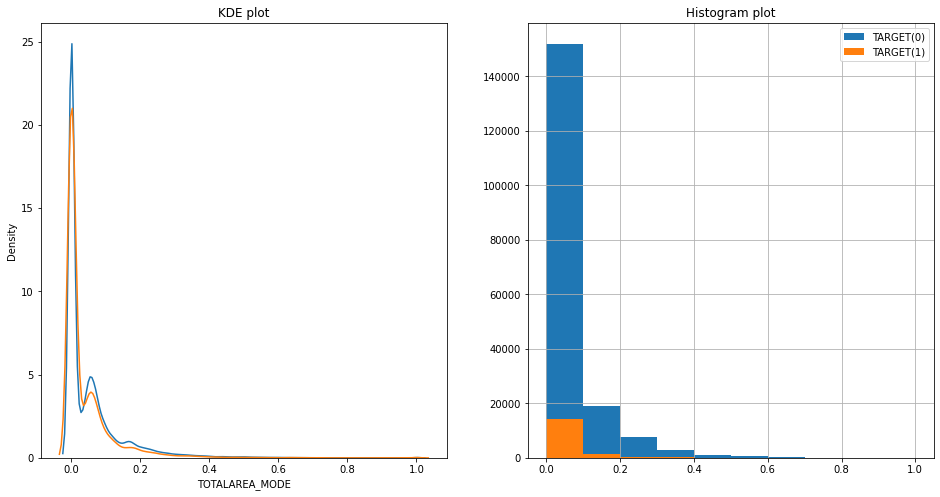

In [ ]:
kde_hist("TOTALAREA_MODE")

## OBS_30_CNT_SOCIAL_CIRCLE ,OBS_60 _CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings with observable 30 DPD (days past due) default

How many observation of client's social surroundings with observable 60 DPD (days past due) default

In [ ]:
missing_data(pd.DataFrame(application_train[["OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"]]))

,Total,Percent
OBS_60_CNT_SOCIAL_CIRCLE,681,0.340701
OBS_30_CNT_SOCIAL_CIRCLE,681,0.340701


In [ ]:
application_train["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
application_test["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
application_train["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
application_test["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [ ]:
application_train["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts()

0.0      107223
1.0       31810
2.0       19253
3.0       13268
4.0        9135
5.0        6253
6.0        4242
7.0        2815
8.0        1911
9.0        1230
10.0        912
11.0        548
12.0        424
13.0        279
14.0        164
15.0        116
16.0         83
17.0         61
18.0         32
19.0         31
20.0         25
21.0         21
22.0         14
25.0          8
23.0          7
24.0          7
27.0          4
26.0          2
47.0          1
348.0         1
30.0          1
28.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

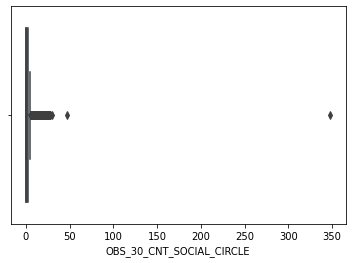

In [ ]:
sns.boxplot(application_train["OBS_30_CNT_SOCIAL_CIRCLE"])

In [ ]:
application_train["OBS_30_CNT_SOCIAL_CIRCLE"] = application_train["OBS_30_CNT_SOCIAL_CIRCLE"].apply(lambda x: 25 if x>25 else x)
application_test["OBS_30_CNT_SOCIAL_CIRCLE"]= application_test["OBS_30_CNT_SOCIAL_CIRCLE"].apply(lambda x: 25 if x>25 else x)

In [ ]:
application_train["OBS_60_CNT_SOCIAL_CIRCLE"] = application_train["OBS_60_CNT_SOCIAL_CIRCLE"].apply(lambda x: 25 if x>25 else x)
application_test["OBS_60_CNT_SOCIAL_CIRCLE"]= application_test["OBS_60_CNT_SOCIAL_CIRCLE"].apply(lambda x: 25 if x>25 else x)

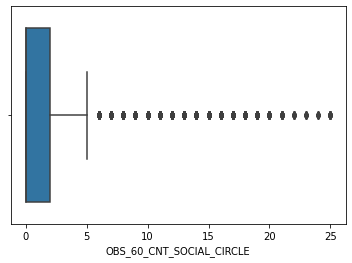

In [ ]:
sns.boxplot(application_train["OBS_60_CNT_SOCIAL_CIRCLE"])

## DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,
How many observation of client's social surroundings defaulted on 30 (days past due) DPD

How many observation of client's social surroundings defaulted on 60 (days past due) DPD

In [ ]:
missing_data(pd.DataFrame(application_train[["DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]))

,Total,Percent
DEF_60_CNT_SOCIAL_CIRCLE,681,0.340701
DEF_30_CNT_SOCIAL_CIRCLE,681,0.340701


In [ ]:
application_train["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
application_test["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
application_train["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
application_test["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [ ]:
application_train["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts()

0.0     177021
1.0      18439
2.0       3443
3.0        776
4.0        156
5.0         37
6.0          7
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [ ]:
application_train["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()

0.0     183103
1.0      14261
2.0       2014
3.0        402
4.0         86
5.0         11
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

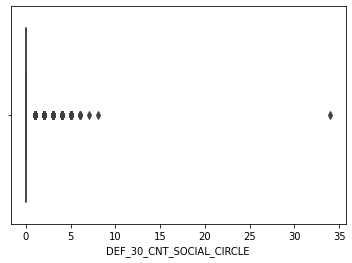

In [ ]:
sns.boxplot(application_train["DEF_30_CNT_SOCIAL_CIRCLE"])

In [ ]:
application_train["DEF_30_CNT_SOCIAL_CIRCLE"] = application_train["DEF_30_CNT_SOCIAL_CIRCLE"].apply(lambda x: 5 if x>4 else x)
application_test["DEF_30_CNT_SOCIAL_CIRCLE"]= application_test["DEF_30_CNT_SOCIAL_CIRCLE"].apply(lambda x: 5 if x>4 else x)
application_train["DEF_60_CNT_SOCIAL_CIRCLE"] = application_train["DEF_60_CNT_SOCIAL_CIRCLE"].apply(lambda x: 5 if x>4 else x)
application_test["DEF_60_CNT_SOCIAL_CIRCLE"]= application_test["DEF_60_CNT_SOCIAL_CIRCLE"].apply(lambda x: 5 if x>4 else x)

## DAYS_LAST_PHONE_CHANGE :
How many days before application did client change phone

In [ ]:
missing_data(pd.DataFrame(application_train["DAYS_LAST_PHONE_CHANGE"]))

,Total,Percent
DAYS_LAST_PHONE_CHANGE,0,0.0


In [ ]:
application_train["DAYS_LAST_PHONE_CHANGE"].describe()

count    199882.000000
mean       -961.815966
std         826.174755
min       -4292.000000
25%       -1568.000000
50%        -756.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
application_train["DAYS_LAST_PHONE_CHANGE"]=application_train["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: x*-1)
application_test["DAYS_LAST_PHONE_CHANGE"]=application_test["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: x*-1)


<Figure size 432x288 with 0 Axes>

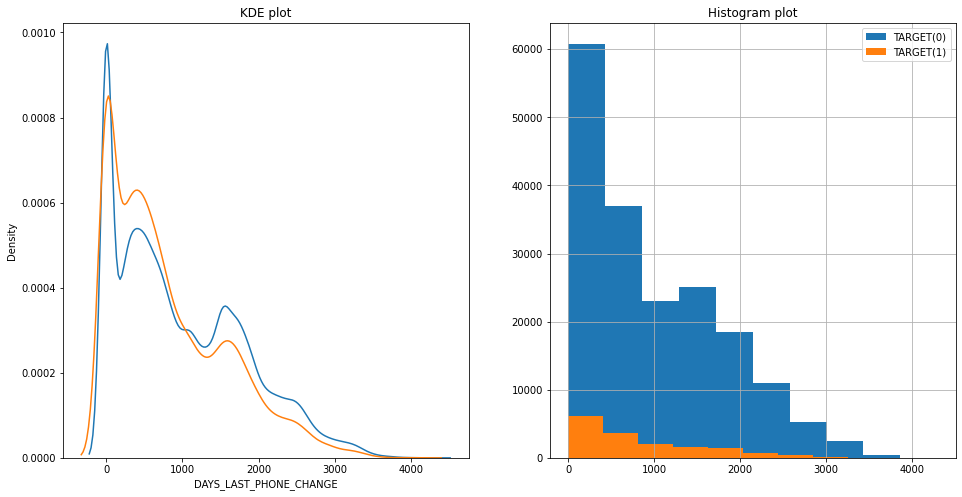

In [ ]:
kde_hist("DAYS_LAST_PHONE_CHANGE")

##  'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'

Number of enquiries to Credit Bureau about the client _____ hour before application

In [ ]:
AMT_REQ = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
missing_data(application_train[AMT_REQ])

,Total,Percent
AMT_REQ_CREDIT_BUREAU_YEAR,26983,13.499465
AMT_REQ_CREDIT_BUREAU_QRT,26983,13.499465
AMT_REQ_CREDIT_BUREAU_MON,26983,13.499465
AMT_REQ_CREDIT_BUREAU_WEEK,26983,13.499465
AMT_REQ_CREDIT_BUREAU_DAY,26983,13.499465
AMT_REQ_CREDIT_BUREAU_HOUR,26983,13.499465


In [ ]:
application_train[AMT_REQ]=application_train[AMT_REQ].fillna(0)
application_test[AMT_REQ]=application_train[AMT_REQ].fillna(0)

In [ ]:
AVG = [ 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG']

In [ ]:
MODE = ['APARTMENTS_MODE','BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE']

In [ ]:
MEDI = ['APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI']

In [ ]:
missing_data(application_train[AVG])

,Total,Percent
COMMONAREA_AVG,139817,69.949770
NONLIVINGAPARTMENTS_AVG,138850,69.465985
LIVINGAPARTMENTS_AVG,136707,68.393852
FLOORSMIN_AVG,135783,67.931580
YEARS_BUILD_AVG,133066,66.572278
LANDAREA_AVG,118809,59.439569
BASEMENTAREA_AVG,117111,58.590068
NONLIVINGAREA_AVG,110435,55.250098
ELEVATORS_AVG,106714,53.388499
APARTMENTS_AVG,101615,50.837494


In [ ]:
missing_data(application_train[MODE])

,Total,Percent
COMMONAREA_MODE,139817,69.949770
NONLIVINGAPARTMENTS_MODE,138850,69.465985
LIVINGAPARTMENTS_MODE,136707,68.393852
FLOORSMIN_MODE,135783,67.931580
YEARS_BUILD_MODE,133066,66.572278
LANDAREA_MODE,118809,59.439569
BASEMENTAREA_MODE,117111,58.590068
NONLIVINGAREA_MODE,110435,55.250098
ELEVATORS_MODE,106714,53.388499
APARTMENTS_MODE,101615,50.837494


In [ ]:
missing_data(application_train[MEDI])

,Total,Percent
COMMONAREA_MEDI,139817,69.949770
NONLIVINGAPARTMENTS_MEDI,138850,69.465985
LIVINGAPARTMENTS_MEDI,136707,68.393852
FLOORSMIN_MEDI,135783,67.931580
YEARS_BUILD_MEDI,133066,66.572278
LANDAREA_MEDI,118809,59.439569
BASEMENTAREA_MEDI,117111,58.590068
NONLIVINGAREA_MEDI,110435,55.250098
ELEVATORS_MEDI,106714,53.388499
APARTMENTS_MEDI,101615,50.837494


In [ ]:
obj_type  = application_train.dtypes[application_train.dtypes=='object'].index
float_type  = application_train.dtypes[application_train.dtypes=='float64'].index
int_type  = application_train.dtypes[application_train.dtypes=='int64'].index

In [ ]:
missing_data(application_train[float_type]).head(50)

,Total,Percent
COMMONAREA_MEDI,139817,69.949770
COMMONAREA_AVG,139817,69.949770
COMMONAREA_MODE,139817,69.949770
NONLIVINGAPARTMENTS_MEDI,138850,69.465985
NONLIVINGAPARTMENTS_MODE,138850,69.465985
NONLIVINGAPARTMENTS_AVG,138850,69.465985
LIVINGAPARTMENTS_AVG,136707,68.393852
LIVINGAPARTMENTS_MODE,136707,68.393852
LIVINGAPARTMENTS_MEDI,136707,68.393852
FLOORSMIN_AVG,135783,67.931580


In [ ]:
# application_train.to_csv("/content/drive/MyDrive/Home Credit/preprocessed_data/app_train.csv",index=False)
# application_test.to_csv("/content/drive/MyDrive/Home Credit/preprocessed_data/app_test.csv",index=False)

## CREDIT_CARD

In [ ]:
credit_df = pd.read_csv("/content/drive/MyDrive/Home Credit/Data/credit_card_balance.csv");

In [ ]:
credit_features_train = application_train[["SK_ID_CURR","TARGET"]]
credit_features_test =pd.DataFrame(application_test["SK_ID_CURR"])

In [ ]:
credit_df.dtypes.value_counts()

float64    15
int64       5
object      3
dtype: int64

In [ ]:
def plot_kde_2(col):
    plt.suptitle(col, fontsize=30)
     
    sns.kdeplot(credit_features_train.loc[credit_features_train['TARGET'] == 0, col],label='TARGET=0')
    sns.kdeplot(credit_features_train.loc[credit_features_train['TARGET'] == 1, col],label='TARGET=1')
    plt.legend(['TARGET(0)', 'TARGET(1)'])
    plt.show()
def plot_hist_2(col):
    plt.suptitle(col, fontsize=30)
    
    credit_features_train.loc[credit_features_train['TARGET'] == 0, col].hist( )
    credit_features_train.loc[credit_features_train['TARGET'] == 1, col].hist( )
    plt.legend(['TARGET(0)', 'TARGET(1)'])
    plt.show()
def kde_hist_2(col):
    plt.suptitle(col, fontsize=30)
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    sns.kdeplot(credit_features_train.loc[credit_features_train['TARGET'] == 0,col], ax=ax[0], label='TARGET(0)')
    sns.kdeplot(credit_features_train.loc[credit_features_train['TARGET'] == 1,col], ax=ax[0], label='TARGET(1)')
    ax[0].set_title('KDE plot')
    ax[1].set_title('Histogram plot')
    credit_features_train.loc[credit_features_train['TARGET'] == 0, col].hist(ax=ax[1])
    credit_features_train.loc[credit_features_train["TARGET"] == 1, col].hist(ax=ax[1])
    ax[1].legend(['TARGET(0)', 'TARGET(1)'])

    plt.show()
def plot_count_2(col):
    sns.countplot(x=col, data=credit_features_train)

In [ ]:
missing_data(credit_df).head(23)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_DPD_DEF,0,0.000000


In [ ]:
obj_type  = credit_df.dtypes[credit_df.dtypes=='object'].index
float_type  = credit_df.dtypes[credit_df.dtypes=='float64'].index
int_type  = credit_df.dtypes[credit_df.dtypes=='int64'].index

In [ ]:
credit_df[obj_type].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS
0,7oo7bed,aed6ex,Active
1,u7drxud,bddbud,Active
2,derexud,ueodax,Active
3,u66bubx,odoubr,Active
4,deubd7d,rbrd6d,Active


## NO of previous loans per coutomer

In [ ]:
NO_LOANS = credit_df.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index().rename(index = str, columns = {'SK_ID_PREV': 'NO_LOANS'})

In [ ]:
NO_LOANS["NO_LOANS"].value_counts()

1    102818
2       732
3         7
4         1
Name: NO_LOANS, dtype: int64

In [ ]:
credit_features_train = credit_features_train.merge(NO_LOANS,on=["SK_ID_CURR"],how="left")
credit_features_test = credit_features_test.merge(NO_LOANS,on=["SK_ID_CURR"],how="left")
print(credit_features_train.shape)
print(credit_features_test.shape)

(199882, 3)
(107629, 2)


In [ ]:
credit_features_train["NO_LOANS"].value_counts()

1.0    56082
2.0      354
3.0        2
4.0        1
Name: NO_LOANS, dtype: int64

In [ ]:
credit_features_train["NO_LOANS"].fillna(0,inplace=True)
credit_features_test["NO_LOANS"].fillna(0,inplace=True)

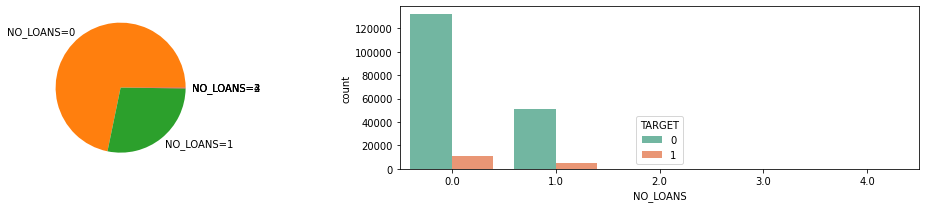

In [ ]:
fig = plt.figure(figsize =(15, 3)) 
plt.subplot(1,2,1)
plt.pie(credit_features_train["NO_LOANS"].value_counts(),colors=['C1','C2','C3','C4','C5'], labels = ["NO_LOANS=0","NO_LOANS=1","NO_LOANS=2","NO_LOANS=3","NO_LOANS=4"]) 

plt.subplot(1,2,2)
sns.countplot(x="NO_LOANS",hue="TARGET",palette = "Set2",data=credit_features_train)
plt.tight_layout()
plt.show()

In [ ]:
credit_df[int_type].head()

,MONTHS_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,CNT_DRAWINGS_CURRENT,SK_DPD,SK_DPD_DEF
0,-13,720000,8,0,0
1,-77,90000,0,0,0
2,-92,112500,0,0,0
3,-40,0,0,0,0
4,-26,225000,19,0,0


In [ ]:
missing_data(credit_df[int_type])

,Total,Percent
SK_DPD_DEF,0,0.0
SK_DPD,0,0.0
CNT_DRAWINGS_CURRENT,0,0.0
AMT_CREDIT_LIMIT_ACTUAL,0,0.0
MONTHS_BALANCE,0,0.0


In [ ]:
AVG_DPD = credit_df.groupby(by= ['SK_ID_CURR'])['SK_DPD'].mean().reset_index().rename(index = str, columns = {'SK_DPD': 'AVG_DPD'})
credit_features_train = credit_features_train.merge(AVG_DPD, on = ['SK_ID_CURR'], how = 'left')
credit_features_test = credit_features_test.merge(AVG_DPD, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
print(credit_features_train.shape)
print(credit_features_test.shape)

(199882, 4)
(107629, 3)


In [ ]:
credit_features_test.head()

,SK_ID_CURR,NO_LOANS,AVG_DPD
0,7auxod,1.0,0.0
1,xur7ur,1.0,0.0
2,eau6rx,0.0,NaN
3,obdr67,0.0,NaN
4,7xbu7d,0.0,NaN


In [ ]:
credit_features_train.fillna(0,inplace=True)
credit_features_test.fillna(0,inplace=True)

In [ ]:
missing_data(credit_df[float_type])

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
AMT_TOTAL_RECEIVABLE,0,0.000000


In [ ]:
credit_df[float_type].head()

,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM
0,4118.715,0.0,78471.135,0.0,78471.135,0.000,82820.925,82820.925,4118.715,4118.715,4118.715,0.0,0.0,8.0,0.0
1,69769.575,0.0,0.000,0.0,0.000,4500.000,9000.000,9000.000,66757.905,69318.405,69318.405,0.0,0.0,0.0,13.0
2,61957.035,0.0,0.000,0.0,0.000,3375.000,3375.000,3375.000,59962.635,61957.035,61957.035,0.0,0.0,0.0,4.0
3,0.000,0.0,0.000,0.0,0.000,0.000,720.945,0.000,0.000,-720.945,-720.945,0.0,0.0,0.0,12.0
4,156958.425,76500.0,107332.875,0.0,30832.875,3448.305,28800.000,28800.000,150199.380,154898.415,154898.415,2.0,0.0,17.0,4.0


## NO OF INSTALMENTS PAID BY CUSTOMER PER LOAN
CNT_INSTALMENT_MATURE_CUM : Gives Number of paid installments on the previous credit.

In [ ]:
grp = credit_df.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_MATURE_CUM'].max().reset_index().rename(index = str, columns = {'CNT_INSTALMENT_MATURE_CUM': 'NO_INSTALMENTS'})
grp1 = grp.groupby(by = ['SK_ID_CURR'])['NO_INSTALMENTS'].sum().reset_index().rename(index = str, columns = {'NO_INSTALMENTS': 'TOTAL_INSTALMENTS'})
credit_features_train = credit_features_train.merge(grp1,on = ['SK_ID_CURR'], how = 'left')
credit_features_test = credit_features_test.merge(grp1,on=['SK_ID_CURR'],how='left')

In [ ]:
credit_features_train.fillna(0,inplace=True)
credit_features_test.fillna(0,inplace=True)

In [ ]:
print(credit_features_train.shape)
print(credit_features_test.shape)

(199882, 5)
(107629, 4)


In [ ]:
credit_features_train.drop(["SK_ID_CURR","TARGET"],axis=1,inplace=True)
credit_features_test.drop(["SK_ID_CURR"],axis=1,inplace=True)

In [ ]:
application_train=pd.concat([application_train, credit_features_train], axis=1)
application_test=pd.concat([application_test, credit_features_test],axis=1)

In [ ]:
del credit_df
del credit_features_test
del credit_features_train

## installments

In [ ]:
installments = pd.read_csv("/content/drive/MyDrive/Home Credit/Data/installments_payments.csv")

In [ ]:
installment_train = application_train[["SK_ID_CURR","TARGET"]]
installment_test =pd.DataFrame(application_test["SK_ID_CURR"])

In [ ]:
installments.shape

(13605401, 8)

In [ ]:
missing_data(installments)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [ ]:
installments.fillna(0,inplace=True)

In [ ]:
installments['Days_Extra_Taken']=installments['DAYS_INSTALMENT']-installments['DAYS_ENTRY_PAYMENT']
installments['AMT_INSTALMENT_difference']=installments['AMT_INSTALMENT']-installments['AMT_PAYMENT']

In [ ]:
installments.drop(["DAYS_INSTALMENT","AMT_INSTALMENT"],axis=1,inplace=True)
installments.drop(["DAYS_ENTRY_PAYMENT","AMT_PAYMENT"],axis=1,inplace=True)

In [ ]:
temp =  installments.drop(["NUM_INSTALMENT_VERSION","NUM_INSTALMENT_NUMBER"],axis=1)

In [ ]:
grp = temp.groupby(["SK_ID_CURR"])["Days_Extra_Taken","AMT_INSTALMENT_difference"].max().reset_index().rename(index = str, columns = {"Days_Extra_Taken": 'MAX_Days_Extra_Taken',"AMT_INSTALMENT_difference":"MAX_AMT_INSTALMENT_difference"})

In [ ]:
grp["MAX_Days_Extra_Taken"].describe()

count    339587.000000
mean         37.927321
std          29.307519
min       -2042.000000
25%          23.000000
50%          31.000000
75%          43.000000
max        3189.000000
Name: MAX_Days_Extra_Taken, dtype: float64

In [ ]:
installment_train = installment_train.merge(grp,on=["SK_ID_CURR"],how="left")
installment_test = installment_test.merge(grp,on=["SK_ID_CURR"],how="left")

In [ ]:
del temp

In [ ]:
del grp
del grp1


In [ ]:
print(installment_test.shape)
print(installment_train.shape)

(107629, 3)
(199882, 4)


In [ ]:
installment_test.fillna(0,inplace=True)
installment_train.fillna(0,inplace=True)

In [ ]:
missing_data(installment_train)

,Total,Percent
MAX_AMT_INSTALMENT_difference,0,0.0
MAX_Days_Extra_Taken,0,0.0
TARGET,0,0.0
SK_ID_CURR,0,0.0


In [ ]:
installment_train.drop(["SK_ID_CURR","TARGET"],axis=1,inplace=True)
installment_test.drop(["SK_ID_CURR"],axis=1,inplace=True)

In [ ]:
application_train=pd.concat([application_train, installment_train],axis=1)
application_test=pd.concat([application_test, installment_test], axis=1)

In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 166)
(107629, 165)


In [ ]:
del installment_test
del installment_train
del installments

##POS_CASH :

In [ ]:
 pos_cash = pd.read_csv("/content/drive/MyDrive/Home Credit/Data/POS_CASH_balance.csv")

In [ ]:
pos_train = application_train[["SK_ID_CURR","TARGET"]]
pos_test =pd.DataFrame(application_test["SK_ID_CURR"])

In [ ]:
temp1 = pos_cash.groupby(by= ['SK_ID_CURR'])['SK_DPD'].mean().reset_index().rename(index = str, columns = {'SK_DPD': 'AVG_DPD'})
temp2 = pos_cash.groupby(by= ['SK_ID_CURR'])['SK_DPD_DEF'].mean().reset_index().rename(index = str, columns = {'SK_DPD_DEF': 'AVG_DPD_DEF'})

In [ ]:
pos_train = pos_train.merge(temp1, on = ['SK_ID_CURR'], how = 'left')
pos_test = pos_test.merge(temp1, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
pos_train = pos_train.merge(temp2, on = ['SK_ID_CURR'], how = 'left')
pos_test = pos_test.merge(temp2, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
del temp1
del temp2

# CNT_INSTALMENT_MATURE_CUM : Gives  Number of paid installments on the previous credit.

In [ ]:
grp = pos_cash.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT'].max().reset_index().rename(index = str, columns = {'CNT_INSTALMENT': 'POS_PAID_INSTALMENTS'})
grp1 = grp.groupby(by = ['SK_ID_CURR'])['POS_PAID_INSTALMENTS'].sum().reset_index().rename(index = str, columns = {'POS_PAID_INSTALMENTS': 'POS_TOTAL_PAID_INSTALMENTS'})
grp2 = pos_cash.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_FUTURE'].min().reset_index().rename(index = str, columns = {'CNT_INSTALMENT_FUTURE': 'POS_NOTPAID_INSTALMENTS'})
grp3 = grp2.groupby(by = ['SK_ID_CURR'])['POS_NOTPAID_INSTALMENTS'].sum().reset_index().rename(index = str, columns = {'POS_NOTPAID_INSTALMENTS': 'POS_TOTAL_NOTPAID_INSTALMENTS'})


In [ ]:
pos_train = pos_train.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
pos_test = pos_test.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
pos_train = pos_train.merge(grp3, on = ['SK_ID_CURR'], how = 'left')
pos_test = pos_test.merge(grp3, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
del grp1
del grp2
del grp3
del grp

In [ ]:
POS_NO_LOANS = pos_cash.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index().rename(index = str, columns = {'SK_ID_PREV': 'NO_LOANS'})

In [ ]:
pos_train = pos_train.merge(POS_NO_LOANS, on = ['SK_ID_CURR'], how = 'left')
pos_test = pos_test.merge(POS_NO_LOANS, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
del POS_NO_LOANS

In [ ]:
print(pos_train.shape)
print(pos_test.shape)

(199882, 7)
(107629, 6)


In [ ]:
pos_train.fillna(0,inplace=True)
pos_test.fillna(0,inplace=True)

In [ ]:
pos_train.drop(["SK_ID_CURR","TARGET"],axis=1,inplace=True)
pos_test.drop(["SK_ID_CURR"],axis=1,inplace=True)

In [ ]:
application_train=pd.concat([application_train, pos_train],axis=1)
application_test=pd.concat([application_test, pos_test], axis=1)

In [ ]:
del pos_cash
del pos_train
del pos_test

In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 171)
(107629, 170)


## bureau

In [ ]:
b1=pd.read_csv("/content/drive/MyDrive/Home Credit/Data/bureau.csv")

In [ ]:
missing_values=b1.isnull().sum()
print(missing_values) 

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64


In [ ]:
# b1=b

In [ ]:
obj_type  = b1.dtypes[b1.dtypes=='object'].index
float_type  = b1.dtypes[b1.dtypes=='float64'].index
int_type  = b1.dtypes[b1.dtypes=='int64'].index

In [ ]:
grpby=b1.groupby(['SK_ID_CURR'])
ftrs = pd.DataFrame({'SK_ID_CURR': b1['SK_ID_CURR'].unique()})
ftrs.head()

,SK_ID_CURR
0,ue6oex
1,7bxax7
2,axrrbx
3,a7bd7r
4,roaexd


In [ ]:
del grpby

In [ ]:
b1['bureau_credit_active_binary'] = (b1['CREDIT_ACTIVE'] != 'Closed').astype(int)
b1['bureau_credit_enddate_binary'] = (b1['DAYS_CREDIT_ENDDATE'] > 0).astype(int)
groupby_SK_ID_CURR = b1.groupby(by=['SK_ID_CURR'])

In [ ]:
group_object = groupby_SK_ID_CURR['DAYS_CREDIT'].agg('count').reset_index()
#When we reset the index, the old index is added as a column, and a new sequential index is used
group_object.rename(index=str, columns={'DAYS_CREDIT': 'bureau_number_of_past_loans'},inplace=True)
ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs.head()

,SK_ID_CURR,bureau_number_of_past_loans
0,ue6oex,7
1,7bxax7,14
2,axrrbx,11
3,a7bd7r,16
4,roaexd,3


In [ ]:
group_object = groupby_SK_ID_CURR['CREDIT_TYPE'].agg('nunique').reset_index()
group_object.rename(index=str, columns={'CREDIT_TYPE': 'bureau_number_of_loan_types'},inplace=True)

ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs.head()

,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types
0,ue6oex,7,3
1,7bxax7,14,2
2,axrrbx,11,3
3,a7bd7r,16,3
4,roaexd,3,1


In [ ]:
ftrs['bureau_average_of_past_loans_per_type'] = \
    ftrs['bureau_number_of_past_loans'] / ftrs['bureau_number_of_loan_types']
ftrs = ftrs.replace([np.inf, -np.inf], np.nan)
ftrs.fillna(value=0, axis=1, inplace=True)

In [ ]:
group_object = groupby_SK_ID_CURR['bureau_credit_active_binary'].agg('mean').reset_index()

ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')


In [ ]:
group_object = groupby_SK_ID_CURR['AMT_CREDIT_SUM_DEBT'].agg('sum').reset_index()
group_object.rename(index=str, columns={'AMT_CREDIT_SUM_DEBT': 'bureau_total_customer_debt'},inplace=True)

ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs.head()

,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types,bureau_average_of_past_loans_per_type,bureau_credit_active_binary,bureau_total_customer_debt
0,ue6oex,7,3,2.333333,0.571429,463599.00
1,7bxax7,14,2,7.000000,0.428571,1610208.00
2,axrrbx,11,3,3.666667,0.272727,66069.00
3,a7bd7r,16,3,5.333333,0.437500,4813666.92
4,roaexd,3,1,3.000000,0.666667,134554.50


In [ ]:
group_object = groupby_SK_ID_CURR['AMT_CREDIT_SUM'].agg('sum').reset_index()
group_object.rename(index=str, columns={'AMT_CREDIT_SUM': 'bureau_total_customer_credit'},inplace=True)

ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')


In [ ]:
ftrs['bureau_debt_credit_ratio'] = \
    ftrs['bureau_total_customer_debt'] / ftrs['bureau_total_customer_credit']
    
ftrs = ftrs.replace([np.inf, -np.inf], np.nan)
ftrs['bureau_debt_credit_ratio'].fillna(value=0, axis=0, inplace=True)

In [ ]:
group_object = groupby_SK_ID_CURR['AMT_CREDIT_SUM_OVERDUE'].agg('sum').reset_index()
group_object.rename(index=str, columns={'AMT_CREDIT_SUM_OVERDUE': 'bureau_total_customer_overdue'},inplace=True)

ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs.head()

,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types,bureau_average_of_past_loans_per_type,bureau_credit_active_binary,bureau_total_customer_debt,bureau_total_customer_credit,bureau_debt_credit_ratio,bureau_total_customer_overdue
0,ue6oex,7,3,2.333333,0.571429,463599.00,4.979380e+06,0.093104,0.0
1,7bxax7,14,2,7.000000,0.428571,1610208.00,3.183107e+06,0.505861,0.0
2,axrrbx,11,3,3.666667,0.272727,66069.00,2.916831e+06,0.022651,0.0
3,a7bd7r,16,3,5.333333,0.437500,4813666.92,2.286314e+07,0.210543,0.0
4,roaexd,3,1,3.000000,0.666667,134554.50,4.753125e+05,0.283086,0.0


In [ ]:
ftrs['bureau_overdue_debt_ratio'] = \
    ftrs['bureau_total_customer_overdue'] / ftrs['bureau_total_customer_debt']


In [ ]:
ftrs = ftrs.replace([np.inf, -np.inf], np.nan)
ftrs['bureau_overdue_debt_ratio'].fillna(value=0, axis=0, inplace=True)

In [ ]:
b1[~b1['AMT_CREDIT_SUM_LIMIT'].isnull()][0:2]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,bureau_credit_active_binary,bureau_credit_enddate_binary
0,ue6oex,eoxbd6b,Closed,currency 1,-1835,0,-739.0,-763.0,NaN,0,675000.0,0.0,0.0,0.0,Consumer credit,-612,0.0,0,0
1,7bxax7,6oaorab,Closed,currency 1,-904,0,-722.0,-691.0,216.945,0,31500.0,0.0,0.0,0.0,Consumer credit,-691,NaN,0,0


In [ ]:
b1['AMT_CREDIT_SUM_DEBT'] = b1['AMT_CREDIT_SUM_DEBT'].fillna(0)
b1['AMT_CREDIT_SUM'] = b1['AMT_CREDIT_SUM'].fillna(0)

grp1 = b1[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = b1[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})
grp1

,SK_ID_CURR,TOTAL_CUSTOMER_DEBT
0,666667,0.0
1,66666d,78201.0
2,66666r,6616462.5
3,66666x,81724.5
4,66667d,0.0
...,...,...
305806,xxxxur,1305333.0
305807,xxxxx7,0.0
305808,xxxxxd,515317.5
305809,xxxxxr,685597.5


In [ ]:
ftrs=ftrs.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
ftrs=ftrs.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
ftrs.head()

,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types,bureau_average_of_past_loans_per_type,bureau_credit_active_binary,bureau_total_customer_debt,bureau_total_customer_credit,bureau_debt_credit_ratio,bureau_total_customer_overdue,bureau_overdue_debt_ratio,TOTAL_CUSTOMER_DEBT,TOTAL_CUSTOMER_CREDIT
0,ue6oex,7,3,2.333333,0.571429,463599.00,4.979380e+06,0.093104,0.0,0.0,463599.00,4.979380e+06
1,7bxax7,14,2,7.000000,0.428571,1610208.00,3.183107e+06,0.505861,0.0,0.0,1610208.00,3.183107e+06
2,axrrbx,11,3,3.666667,0.272727,66069.00,2.916831e+06,0.022651,0.0,0.0,66069.00,2.916831e+06
3,a7bd7r,16,3,5.333333,0.437500,4813666.92,2.286314e+07,0.210543,0.0,0.0,4813666.92,2.286314e+07
4,roaexd,3,1,3.000000,0.666667,134554.50,4.753125e+05,0.283086,0.0,0.0,134554.50,4.753125e+05


In [ ]:
ftrs['DEBT_CREDIT_RATIO'] = ftrs['TOTAL_CUSTOMER_DEBT']/ftrs['TOTAL_CUSTOMER_CREDIT']


In [ ]:
ftrs = ftrs.replace([np.inf, -np.inf], 0)

In [ ]:
group_object = groupby_SK_ID_CURR['CNT_CREDIT_PROLONG'].agg('sum').reset_index()
group_object.rename(index=str, columns={'CNT_CREDIT_PROLONG': 'bureau_total_prolonged_count'},inplace=True)

ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')


In [ ]:
group_object = groupby_SK_ID_CURR['bureau_credit_enddate_binary'].agg('mean').reset_index()
group_object.rename(index=str, columns={'bureau_credit_enddate_binary': 'bureau_credit_enddate_percentage'},inplace=True)

ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')


In [ ]:
group_object = groupby_SK_ID_CURR['SK_ID_BUREAU'].agg('nunique').reset_index()
group_object.rename(index=str, columns={'SK_ID_BUREAU': 'bureau_query_count'},inplace=True)

ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')


In [ ]:
b1['CREDIT_ENDDATE_BINARY'] = b1['DAYS_CREDIT_ENDDATE']

def f(x):
    if x<0:
        y = 0
    else:
        y = 1   
    return y

In [ ]:
b1['CREDIT_ENDDATE_BINARY'] = b1.apply(lambda x: f(x.DAYS_CREDIT_ENDDATE), axis = 1)
print("New Binary Column calculated")

grp = b1.groupby(by = ['SK_ID_CURR'])['CREDIT_ENDDATE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ENDDATE_BINARY': 'CREDIT_ENDDATE_PERCENTAGE'})
ftrs=ftrs.merge(grp, on = ['SK_ID_CURR'], how = 'left')
ftrs.head()

New Binary Column calculated


,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types,bureau_average_of_past_loans_per_type,bureau_credit_active_binary,bureau_total_customer_debt,bureau_total_customer_credit,bureau_debt_credit_ratio,bureau_total_customer_overdue,bureau_overdue_debt_ratio,TOTAL_CUSTOMER_DEBT,TOTAL_CUSTOMER_CREDIT,DEBT_CREDIT_RATIO,bureau_total_prolonged_count,bureau_credit_enddate_percentage,bureau_query_count,CREDIT_ENDDATE_PERCENTAGE
0,ue6oex,7,3,2.333333,0.571429,463599.00,4.979380e+06,0.093104,0.0,0.0,463599.00,4.979380e+06,0.093104,0,0.428571,7,0.428571
1,7bxax7,14,2,7.000000,0.428571,1610208.00,3.183107e+06,0.505861,0.0,0.0,1610208.00,3.183107e+06,0.505861,0,0.571429,14,0.571429
2,axrrbx,11,3,3.666667,0.272727,66069.00,2.916831e+06,0.022651,0.0,0.0,66069.00,2.916831e+06,0.022651,0,0.181818,11,0.181818
3,a7bd7r,16,3,5.333333,0.437500,4813666.92,2.286314e+07,0.210543,0.0,0.0,4813666.92,2.286314e+07,0.210543,0,0.375000,16,0.437500
4,roaexd,3,1,3.000000,0.666667,134554.50,4.753125e+05,0.283086,0.0,0.0,134554.50,4.753125e+05,0.283086,0,0.666667,3,0.666667


## bureau balance 
less features are  present

In [ ]:
bur=pd.read_csv("/content/drive/MyDrive/Home Credit/Data/bureau_balance.csv")

In [ ]:
bur.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,rera7rb,-2,C
1,eoru6bb,-62,X
2,xebr7e6,-62,C
3,dre7676,-5,X
4,rrda6db,-70,C


In [ ]:
bur = bur.merge(b1[['SK_ID_CURR', 'SK_ID_BUREAU']], on='SK_ID_BUREAU', how='right')
bur.head


<bound method NDFrame.head of          SK_ID_BUREAU  MONTHS_BALANCE STATUS SK_ID_CURR
0             eoxbd6b           -37.0      X     ue6oex
1             eoxbd6b           -28.0      0     ue6oex
2             eoxbd6b           -46.0      1     ue6oex
3             eoxbd6b           -27.0      X     ue6oex
4             eoxbd6b           -21.0      C     ue6oex
...               ...             ...    ...        ...
25121810      u6orbdb           -24.0      C     6bbrbd
25121811      u6orbdb            -4.0      C     6bbrbd
25121812      u6orbdb           -53.0      5     6bbrbd
25121813      u6orbdb           -19.0      C     6bbrbd
25121814      u6orbdb           -68.0      0     6bbrbd

[25121815 rows x 4 columns]>

In [ ]:
grpby1=bur.groupby(['SK_ID_CURR'])
ftrs1 = pd.DataFrame({'SK_ID_CURR': bur['SK_ID_CURR'].unique()})
ftrs1.head()

,SK_ID_CURR
0,ue6oex
1,7bxax7
2,axrrbx
3,a7bd7r
4,roaexd


In [ ]:
grpby2=bur.groupby(['SK_ID_CURR'])
ftrs2 = pd.DataFrame({'SK_ID_BUREAU': bur['SK_ID_BUREAU'].unique()})


In [ ]:
 groupby_SK_ID_CURR1 = bur.groupby(by=['SK_ID_CURR'])

In [ ]:
group_object = groupby_SK_ID_CURR1['MONTHS_BALANCE'].agg('sum').reset_index()
#When we reset the index, the old index is added as a column, and a new sequential index is used
group_object.rename(index=str, columns={'MONTHS_BALANCE': 'Month_bal_rel_to_appctn_date'},inplace=True)
ftrs1 = ftrs1.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs1.head()

,SK_ID_CURR,Month_bal_rel_to_appctn_date
0,ue6oex,-7859.0
1,7bxax7,0.0
2,axrrbx,0.0
3,a7bd7r,0.0
4,roaexd,0.0


In [ ]:

def status_to_int(status):
    if status in ['X', 'C']:
        return 0
    if pd.isnull(status):
        return np.nan
    return int(status)


In [ ]:
bur['bureau_balance_dpd_level'] = bur['STATUS'].apply(status_to_int)
bur['bureau_balance_status_unknown'] = (bur['STATUS'] == 'X').astype(int)
bur['bureau_balance_status_closed'] = (bur['STATUS'] == 'C').astype(int)

In [ ]:
group_object = groupby_SK_ID_CURR1['bureau_balance_dpd_level'].agg('sum').reset_index()
#When we reset the index, the old index is added as a column, and a new sequential index is used
group_object.rename(index=str, columns={'bureau_balance_dpd_level': 'debt_past_due'},inplace=True)
ftrs1 = ftrs1.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs1.head()

,SK_ID_CURR,Month_bal_rel_to_appctn_date,debt_past_due
0,ue6oex,-7859.0,5.0
1,7bxax7,0.0,0.0
2,axrrbx,0.0,0.0
3,a7bd7r,0.0,0.0
4,roaexd,0.0,0.0


In [ ]:
group_object = groupby_SK_ID_CURR1['bureau_balance_status_closed'].agg('max').reset_index()
#When we reset the index, the old index is added as a column, and a new sequential index is used
group_object.rename(index=str, columns={'bureau_balance_status_closed': 'bb_status_closed'},inplace=True)
ftrs1 = ftrs1.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs1.head()

,SK_ID_CURR,Month_bal_rel_to_appctn_date,debt_past_due,bb_status_closed
0,ue6oex,-7859.0,5.0,1
1,7bxax7,0.0,0.0,0
2,axrrbx,0.0,0.0,0
3,a7bd7r,0.0,0.0,0
4,roaexd,0.0,0.0,0


In [ ]:
bbData=pd.DataFrame()
bbData=ftrs.merge(ftrs1,left_on=['SK_ID_CURR'], right_on=['SK_ID_CURR'], how='left', validate='one_to_one')
bbData.head()

,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types,bureau_average_of_past_loans_per_type,bureau_credit_active_binary,bureau_total_customer_debt,bureau_total_customer_credit,bureau_debt_credit_ratio,bureau_total_customer_overdue,bureau_overdue_debt_ratio,TOTAL_CUSTOMER_DEBT,TOTAL_CUSTOMER_CREDIT,DEBT_CREDIT_RATIO,bureau_total_prolonged_count,bureau_credit_enddate_percentage,bureau_query_count,CREDIT_ENDDATE_PERCENTAGE,Month_bal_rel_to_appctn_date,debt_past_due,bb_status_closed
0,ue6oex,7,3,2.333333,0.571429,463599.00,4.979380e+06,0.093104,0.0,0.0,463599.00,4.979380e+06,0.093104,0,0.428571,7,0.428571,-7859.0,5.0,1
1,7bxax7,14,2,7.000000,0.428571,1610208.00,3.183107e+06,0.505861,0.0,0.0,1610208.00,3.183107e+06,0.505861,0,0.571429,14,0.571429,0.0,0.0,0
2,axrrbx,11,3,3.666667,0.272727,66069.00,2.916831e+06,0.022651,0.0,0.0,66069.00,2.916831e+06,0.022651,0,0.181818,11,0.181818,0.0,0.0,0
3,a7bd7r,16,3,5.333333,0.437500,4813666.92,2.286314e+07,0.210543,0.0,0.0,4813666.92,2.286314e+07,0.210543,0,0.375000,16,0.437500,0.0,0.0,0
4,roaexd,3,1,3.000000,0.666667,134554.50,4.753125e+05,0.283086,0.0,0.0,134554.50,4.753125e+05,0.283086,0,0.666667,3,0.666667,0.0,0.0,0


In [ ]:
bbData.head()

,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types,bureau_average_of_past_loans_per_type,bureau_credit_active_binary,bureau_total_customer_debt,bureau_total_customer_credit,bureau_debt_credit_ratio,bureau_total_customer_overdue,bureau_overdue_debt_ratio,TOTAL_CUSTOMER_DEBT,TOTAL_CUSTOMER_CREDIT,DEBT_CREDIT_RATIO,bureau_total_prolonged_count,bureau_credit_enddate_percentage,bureau_query_count,CREDIT_ENDDATE_PERCENTAGE,Month_bal_rel_to_appctn_date,debt_past_due,bb_status_closed
0,ue6oex,7,3,2.333333,0.571429,463599.00,4.979380e+06,0.093104,0.0,0.0,463599.00,4.979380e+06,0.093104,0,0.428571,7,0.428571,-7859.0,5.0,1
1,7bxax7,14,2,7.000000,0.428571,1610208.00,3.183107e+06,0.505861,0.0,0.0,1610208.00,3.183107e+06,0.505861,0,0.571429,14,0.571429,0.0,0.0,0
2,axrrbx,11,3,3.666667,0.272727,66069.00,2.916831e+06,0.022651,0.0,0.0,66069.00,2.916831e+06,0.022651,0,0.181818,11,0.181818,0.0,0.0,0
3,a7bd7r,16,3,5.333333,0.437500,4813666.92,2.286314e+07,0.210543,0.0,0.0,4813666.92,2.286314e+07,0.210543,0,0.375000,16,0.437500,0.0,0.0,0
4,roaexd,3,1,3.000000,0.666667,134554.50,4.753125e+05,0.283086,0.0,0.0,134554.50,4.753125e+05,0.283086,0,0.666667,3,0.666667,0.0,0.0,0


In [ ]:
application_train = application_train.merge(bbData,on=["SK_ID_CURR"],how="left")
application_test = application_test.merge(bbData,on=["SK_ID_CURR"],how="left")

In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 190)
(107629, 189)


In [ ]:
del bur
del b1
del grpby1
del grpby2
del groupby_SK_ID_CURR
del groupby_SK_ID_CURR1
del group_object

In [ ]:
del ftrs1
del ftrs
del ftrs2

## Previous_Application

In [ ]:
prev=pd.read_csv("/content/drive/MyDrive/Home Credit/Data/previous_application.csv")

In [ ]:
# PREV_APP_AGG = []
# for agg in ['mean', 'min', 'max', 'sum', 'var']:
#     for select in ['AMT_ANNUITY',
#                    'AMT_APPLICATION',
#                    'AMT_CREDIT',
#                    'AMT_DOWN_PAYMENT',
#                    'AMT_GOODS_PRICE',
#                    'CNT_PAYMENT',
#                    'DAYS_DECISION',
#                    'HOUR_APPR_PROCESS_START',
#                    'RATE_DOWN_PAYMENT'
#                    ]:
#         PREV_APP_AGG.append((select, agg))
# PREV_APP_AGG = [(['SK_ID_CURR'], PREV_APP_AGG)]

In [ ]:
# grpby_agg_names = []
# for groupby_cols, specs in tqdm(PREV_APP_AGG):
#     group_object = prev.groupby(groupby_cols)
#     for select, agg in tqdm(specs):
#         grpby_agg_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
#         application_train = application_train.merge(group_object[select]
#                               .agg(agg)
#                               .reset_index()
#                               .rename(index=str,
#                                       columns={select: grpby_agg_name})
#                               [groupby_cols + [grpby_agg_name]],
#                               on=groupby_cols,
#                               how='left')
#         application_test = application_test.merge(group_object[select]
#                               .agg(agg)
#                               .reset_index()
#                               .rename(index=str,
#                                       columns={select: grpby_agg_name})
#                               [groupby_cols + [grpby_agg_name]],
#                               on=groupby_cols,
#                               how='left')
#         grpby_agg_names.append(grpby_agg_name)

In [ ]:
ftrs = pd.DataFrame({'SK_ID_CURR': prev['SK_ID_CURR'].unique()})
ftrs.head()

,SK_ID_CURR
0,b7eodr
1,e6ooux
2,u7dard
3,e7babr
4,udaxbx


In [ ]:
prev_sorted = prev.sort_values(['SK_ID_CURR', 'DAYS_DECISION'])
prev_sorted.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1511947,ddu677d,666667,Consumer loans,10346.535,59152.5,58356.0,3550.5,59152.5,THURSDAY,17,Y,1,0.062462,NaN,NaN,XAP,Approved,-2539,Cash through the bank,XAP,Family,New,Consumer Electronics,POS,XNA,Stone,50,Consumer electronics,6.0,low_normal,POS household without interest,365243.0,-2508.0,-2358.0,-2358.0,-2354.0,1.0
970963,odeoaxx,666667,Consumer loans,18103.275,93955.5,98914.5,0.0,93955.5,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-1108,Cash through the bank,XAP,Family,Refreshed,Computers,POS,XNA,Regional / Local,1169,Consumer electronics,6.0,middle,POS household with interest,365243.0,-1077.0,-927.0,-927.0,-919.0,0.0
1317092,d7xaabd,666667,Revolving loans,5625.000,0.0,112500.0,NaN,NaN,WEDNESDAY,14,Y,1,NaN,NaN,NaN,XAP,Approved,-1105,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,AP+ (Cash loan),10,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
480139,oab7e7x,66666d,Consumer loans,6863.040,47695.5,34195.5,13500.0,47695.5,WEDNESDAY,9,Y,1,0.308262,NaN,NaN,XAP,Approved,-2813,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Stone,2,Industry,6.0,high,POS industry with interest,365243.0,-2779.0,-2629.0,-2659.0,-2620.0,0.0
1182628,a6o7xux,66666r,Consumer loans,14317.695,124020.0,129654.0,6750.0,124020.0,TUESDAY,17,Y,1,0.053894,NaN,NaN,XAP,Approved,-874,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,25,Connectivity,12.0,high,POS mobile with interest,365243.0,-835.0,-505.0,-535.0,-526.0,0.0


In [ ]:
group_object = prev_sorted.groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index()
group_object.rename(index=str,
                    columns={'SK_ID_PREV': 'previous_application_number_of_prev_application'},
                    inplace=True)
ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')

In [ ]:
prev_sorted['previous_application_prev_was_approved'] = (prev_sorted['NAME_CONTRACT_STATUS'] == 'Approved').astype('int')
group_object = prev_sorted.groupby(by=['SK_ID_CURR'])['previous_application_prev_was_approved'].last().reset_index()
ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs.head(5)

,SK_ID_CURR,previous_application_number_of_prev_application,previous_application_prev_was_approved
0,b7eodr,7,1
1,e6ooux,10,0
2,u7dard,6,0
3,e7babr,7,0
4,udaxbx,17,0


In [ ]:
prev_sorted['previous_application_prev_was_refused'] = (prev_sorted['NAME_CONTRACT_STATUS'] == 'Refused').astype('int')
group_object = prev_sorted.groupby(by=['SK_ID_CURR'])['previous_application_prev_was_refused'].last().reset_index()
ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs.head(5)

,SK_ID_CURR,previous_application_number_of_prev_application,previous_application_prev_was_approved,previous_application_prev_was_refused
0,b7eodr,7,1,0
1,e6ooux,10,0,0
2,u7dard,6,0,1
3,e7babr,7,0,0
4,udaxbx,17,0,0


In [ ]:
numbers_of_applications=[1,3,5]

In [ ]:
for number in numbers_of_applications:
    prev_tail = prev_sorted.groupby(by=['SK_ID_CURR']).tail(number)

    group_object = prev_tail.groupby(by=['SK_ID_CURR'])['CNT_PAYMENT'].mean().reset_index()
    group_object.rename(index=str, columns={
        'CNT_PAYMENT': 'previous_application_term_of_last_{}_credits_mean'.format(number)},
                        inplace=True)
    ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')

    group_object = prev_tail.groupby(by=['SK_ID_CURR'])['DAYS_DECISION'].mean().reset_index()
    group_object.rename(index=str, columns={
        'DAYS_DECISION': 'previous_application_days_decision_about_last_{}_credits_mean'.format(number)},
                        inplace=True)
    ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')

    group_object = prev_tail.groupby(by=['SK_ID_CURR'])['DAYS_FIRST_DRAWING'].mean().reset_index()
    group_object.rename(index=str, columns={
        'DAYS_FIRST_DRAWING': 'previous_application_days_first_drawing_last_{}_credits_mean'.format(number)},
                        inplace=True)
    ftrs = ftrs.merge(group_object, on=['SK_ID_CURR'], how='left')
ftrs.head(5)

,SK_ID_CURR,previous_application_number_of_prev_application,previous_application_prev_was_approved,previous_application_prev_was_refused,previous_application_term_of_last_1_credits_mean,previous_application_days_decision_about_last_1_credits_mean,previous_application_days_first_drawing_last_1_credits_mean,previous_application_term_of_last_3_credits_mean,previous_application_days_decision_about_last_3_credits_mean,previous_application_days_first_drawing_last_3_credits_mean,previous_application_term_of_last_5_credits_mean,previous_application_days_decision_about_last_5_credits_mean,previous_application_days_first_drawing_last_5_credits_mean
0,b7eodr,7,1,0,10.0,-137,365243.0,26.666667,-210.333333,365243.0,19.200000,-259.8,365243.0
1,e6ooux,10,0,0,12.0,-86,NaN,18.000000,-233.666667,NaN,19.500000,-369.6,365243.0
2,u7dard,6,0,1,NaN,-317,NaN,10.000000,-319.000000,365243.0,35.333333,-447.6,365243.0
3,e7babr,7,0,0,NaN,-105,NaN,18.000000,-111.000000,365243.0,12.000000,-185.4,365243.0
4,udaxbx,17,0,0,NaN,-31,NaN,12.000000,-69.000000,NaN,12.000000,-89.0,NaN


In [ ]:
prev_sorted['revolving_loan'] = (prev_sorted['NAME_CONTRACT_TYPE'] == 'Revolving loans').astype('int')
prev_sorted['cash_loan'] = (prev_sorted['NAME_CONTRACT_TYPE'] == 'Cash loans').astype('int')
prev_sorted['consumer_loan'] = (prev_sorted['NAME_CONTRACT_TYPE'] == 'Consumer loans').astype('int')
prev_sorted.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,previous_application_prev_was_approved,previous_application_prev_was_refused,revolving_loan,cash_loan,consumer_loan
1511947,ddu677d,666667,Consumer loans,10346.535,59152.5,58356.0,3550.5,59152.5,THURSDAY,17,Y,1,0.062462,NaN,NaN,XAP,Approved,-2539,Cash through the bank,XAP,Family,New,Consumer Electronics,POS,XNA,Stone,50,Consumer electronics,6.0,low_normal,POS household without interest,365243.0,-2508.0,-2358.0,-2358.0,-2354.0,1.0,1,0,0,0,1
970963,odeoaxx,666667,Consumer loans,18103.275,93955.5,98914.5,0.0,93955.5,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-1108,Cash through the bank,XAP,Family,Refreshed,Computers,POS,XNA,Regional / Local,1169,Consumer electronics,6.0,middle,POS household with interest,365243.0,-1077.0,-927.0,-927.0,-919.0,0.0,1,0,0,0,1
1317092,d7xaabd,666667,Revolving loans,5625.000,0.0,112500.0,NaN,NaN,WEDNESDAY,14,Y,1,NaN,NaN,NaN,XAP,Approved,-1105,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,AP+ (Cash loan),10,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0,1,0,1,0,0
480139,oab7e7x,66666d,Consumer loans,6863.040,47695.5,34195.5,13500.0,47695.5,WEDNESDAY,9,Y,1,0.308262,NaN,NaN,XAP,Approved,-2813,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Stone,2,Industry,6.0,high,POS industry with interest,365243.0,-2779.0,-2629.0,-2659.0,-2620.0,0.0,1,0,0,0,1
1182628,a6o7xux,66666r,Consumer loans,14317.695,124020.0,129654.0,6750.0,124020.0,TUESDAY,17,Y,1,0.053894,NaN,NaN,XAP,Approved,-874,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,25,Connectivity,12.0,high,POS mobile with interest,365243.0,-835.0,-505.0,-535.0,-526.0,0.0,1,0,0,0,1


In [ ]:
prev_sorted['credit_goods_diff'] = prev_sorted['AMT_CREDIT'] - prev_sorted['AMT_GOODS_PRICE']
prev_sorted['credit_goods_ratio'] = prev_sorted['AMT_CREDIT'] / prev_sorted['AMT_GOODS_PRICE']

In [ ]:
prev_sorted['application_credit_diff'] = prev_sorted['AMT_APPLICATION'] - prev_sorted['AMT_CREDIT']
prev_sorted['application_credit_ratio'] = prev_sorted['AMT_APPLICATION'] / prev_sorted['AMT_CREDIT']

In [ ]:
prev_sorted['NAME_PRODUCT_TYPE_x_sell'] = (prev_sorted['NAME_PRODUCT_TYPE'] == 'x-sell').astype('int')
prev_sorted['NAME_PRODUCT_TYPE_walk_in'] = (prev_sorted['NAME_PRODUCT_TYPE'] == 'walk-in').astype('int')


In [ ]:
prev_sorted['NAME_PAYMENT_TYPE_account'] = (prev_sorted['NAME_PAYMENT_TYPE'] == 'Non-cash from your account').astype('int')
prev_sorted['NAME_PAYMENT_TYPE_employer'] = (prev_sorted['NAME_PAYMENT_TYPE'] == 'Cashless from the account of the employer').astype('int')
prev_sorted.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,previous_application_prev_was_approved,previous_application_prev_was_refused,revolving_loan,cash_loan,consumer_loan,credit_goods_diff,credit_goods_ratio,application_credit_diff,application_credit_ratio,NAME_PRODUCT_TYPE_x_sell,NAME_PRODUCT_TYPE_walk_in,NAME_PAYMENT_TYPE_account,NAME_PAYMENT_TYPE_employer
1511947,ddu677d,666667,Consumer loans,10346.535,59152.5,58356.0,3550.5,59152.5,THURSDAY,17,Y,1,0.062462,NaN,NaN,XAP,Approved,-2539,Cash through the bank,XAP,Family,New,Consumer Electronics,POS,XNA,Stone,50,Consumer electronics,6.0,low_normal,POS household without interest,365243.0,-2508.0,-2358.0,-2358.0,-2354.0,1.0,1,0,0,0,1,-796.5,0.986535,796.5,1.013649,0,0,0,0
970963,odeoaxx,666667,Consumer loans,18103.275,93955.5,98914.5,0.0,93955.5,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-1108,Cash through the bank,XAP,Family,Refreshed,Computers,POS,XNA,Regional / Local,1169,Consumer electronics,6.0,middle,POS household with interest,365243.0,-1077.0,-927.0,-927.0,-919.0,0.0,1,0,0,0,1,4959.0,1.052780,-4959.0,0.949866,0,0,0,0
1317092,d7xaabd,666667,Revolving loans,5625.000,0.0,112500.0,NaN,NaN,WEDNESDAY,14,Y,1,NaN,NaN,NaN,XAP,Approved,-1105,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,AP+ (Cash loan),10,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0,1,0,1,0,0,NaN,NaN,-112500.0,0.000000,1,0,0,0
480139,oab7e7x,66666d,Consumer loans,6863.040,47695.5,34195.5,13500.0,47695.5,WEDNESDAY,9,Y,1,0.308262,NaN,NaN,XAP,Approved,-2813,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Stone,2,Industry,6.0,high,POS industry with interest,365243.0,-2779.0,-2629.0,-2659.0,-2620.0,0.0,1,0,0,0,1,-13500.0,0.716954,13500.0,1.394789,0,0,0,0
1182628,a6o7xux,66666r,Consumer loans,14317.695,124020.0,129654.0,6750.0,124020.0,TUESDAY,17,Y,1,0.053894,NaN,NaN,XAP,Approved,-874,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,25,Connectivity,12.0,high,POS mobile with interest,365243.0,-835.0,-505.0,-535.0,-526.0,0.0,1,0,0,0,1,5634.0,1.045428,-5634.0,0.956546,0,0,0,0


In [ ]:
prev_sorted['approved'] = (prev_sorted['NAME_CONTRACT_STATUS'] == 'Approved').astype('int')
prev_sorted['refused'] = (prev_sorted['NAME_CONTRACT_STATUS'] == 'Refused').astype('int')

In [ ]:
prev_sorted_grpby = prev_sorted.groupby(by=['SK_ID_CURR'])

In [ ]:
g = prev_sorted_grpby['refused'].mean().reset_index()
g.rename(index=str, columns={'refused': 'previous_application_fraction_of_refused_applications'}, inplace=True)
ftrs = ftrs.merge(g, on=['SK_ID_CURR'], how='left')
ftrs.head(5)

,SK_ID_CURR,previous_application_number_of_prev_application,previous_application_prev_was_approved,previous_application_prev_was_refused,previous_application_term_of_last_1_credits_mean,previous_application_days_decision_about_last_1_credits_mean,previous_application_days_first_drawing_last_1_credits_mean,previous_application_term_of_last_3_credits_mean,previous_application_days_decision_about_last_3_credits_mean,previous_application_days_first_drawing_last_3_credits_mean,previous_application_term_of_last_5_credits_mean,previous_application_days_decision_about_last_5_credits_mean,previous_application_days_first_drawing_last_5_credits_mean,previous_application_fraction_of_refused_applications
0,b7eodr,7,1,0,10.0,-137,365243.0,26.666667,-210.333333,365243.0,19.200000,-259.8,365243.0,0.142857
1,e6ooux,10,0,0,12.0,-86,NaN,18.000000,-233.666667,NaN,19.500000,-369.6,365243.0,0.200000
2,u7dard,6,0,1,NaN,-317,NaN,10.000000,-319.000000,365243.0,35.333333,-447.6,365243.0,0.333333
3,e7babr,7,0,0,NaN,-105,NaN,18.000000,-111.000000,365243.0,12.000000,-185.4,365243.0,0.000000
4,udaxbx,17,0,0,NaN,-31,NaN,12.000000,-69.000000,NaN,12.000000,-89.0,NaN,0.117647


In [ ]:
ftrs.shape

(338857, 14)

In [ ]:
application_train=application_train.merge(ftrs,left_on=['SK_ID_CURR'],right_on=['SK_ID_CURR'], how='left',validate='one_to_one')
application_test=application_test.merge(ftrs,left_on=['SK_ID_CURR'],right_on=['SK_ID_CURR'], how='left',validate='one_to_one')

In [ ]:
del prev
del prev_sorted
del prev_sorted_grpby
del ftrs



In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 203)
(107629, 202)


In [ ]:
train_id = application_train["SK_ID_CURR"]
train_target = application_train["TARGET"]
test_id = application_test["SK_ID_CURR"]

In [ ]:
application_train.drop(["SK_ID_CURR","TARGET"],axis=1,inplace=True)
application_test.drop(["SK_ID_CURR"],axis=1,inplace=True)

In [ ]:
print(application_train.shape)
print(application_test.shape)

(199882, 201)
(107629, 201)


In [ ]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(application_train)
application_train = imputer.transform(application_train)
application_test = imputer.transform(application_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(application_train)
application_train = scaler.transform(application_train)
application_test = scaler.transform(application_test)

In [ ]:
application_train = pd.DataFrame(application_train)
application_test = pd.DataFrame(application_test)

In [ ]:
# application_train.to_csv("/content/drive/MyDrive/Home Credit/final_Data/train.csv")
# application_test.to_csv("/content/drive/MyDrive/Home Credit/final_Data/test.csv")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
 
 
import xgboost as xgb
import lightgbm as lgb
 
 
 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

Lgb

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(application_train,train_target, test_size = 0.3, random_state = 0)

In [ ]:
import lightgbm as lgb
model4 = lgb.LGBMClassifier()
model4.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred_lgb=model4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_lgb, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lgb)))

LightGBM Model accuracy score: 0.9192


In [ ]:
model4.fit(application_train,train_target)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred_lgb=model4.predict_proba(application_test)[:,1]

xgb

In [ ]:
model2=xgb.XGBClassifier(random_state=1,learning_rate=0.1,n_estimators=800,max_depth=11,min_child_weight=9,subsample=1,gamma=0.2,colsample_bytree=0.4,nthread=-1,objective='binary:logistic',scale_pos_weight=1,reg_alpha=0.6,reg_lambda=3,seed=42)
model2.fit(application_train, train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=9, missing=None, n_estimators=800, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=1,
              reg_alpha=0.6, reg_lambda=3, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = model2.predict_proba(application_test)[:, 1]

random forest

In [ ]:
clf = RandomForestClassifier(n_estimators=400, min_samples_split=10, min_samples_leaf=5, n_jobs=-1, random_state=42)
clf.fit(application_train,train_target)
y_pred_rf = clf.predict_proba(application_test)[:, 1]


In [ ]:
weighted_prediction = pd.DataFrame()
weighted_prediction["SK_ID_CURR"] = test_id

In [ ]:
weighted_prediction["TARGET"] = (0.20*xgb_pred)+(0.70*lgb_pred)+(0.10*rf_pred)

NameError: ignored

In [ ]:
# weighted_prediction.to_csv('/content/drive/MyDrive/Home Credit/final_Data/final_submit2.csv',index=False)